In [1]:
# My standard opening cell
%matplotlib notebook
    
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:95% !important; }</style>'))
   
from matplotlib import pyplot as plt
from matplotlib import cm,colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import scipy as sp

In [2]:
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.patches import Circle

import numpy.lib.index_tricks as itricks
from astropy.io import fits

In [3]:
#bigd = fits.open("/u/ec/roodman/kipacdisk/Donuts/bigdonuts/DECam_runwave_00236392.S4.0002.third.donut.fits")
bigd = fits.open("/nfs/slac/g/ki/ki06/roodman/Donuts/20130919s2/236392/v23/DECam_00236392.S4.0003.third.donut.fits.fz")

In [4]:
bigd.info()
print(bigd[1].header)

Filename: /nfs/slac/g/ki/ki06/roodman/Donuts/20130919s2/236392/v23/DECam_00236392.S4.0003.third.donut.fits.fz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  S4            1 PrimaryHDU     131   ()      
  1  S4            1 CompImageHDU    138   (256, 256)   float64   
  2  S4            1 CompImageHDU     54   (256, 256)   float64   
  3  COMPRESSED_IMAGE    1 CompImageHDU     13   (256, 256)   float64   
XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  256                                                  NAXIS2  =                  256                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               DX      = 

In [5]:
bck = 0.0
imdata = bigd[2].data - bigd[1].header['BKGD']
immodel = bigd[1].data - bigd[1].header['BKGD']

<IPython.core.display.Javascript object>


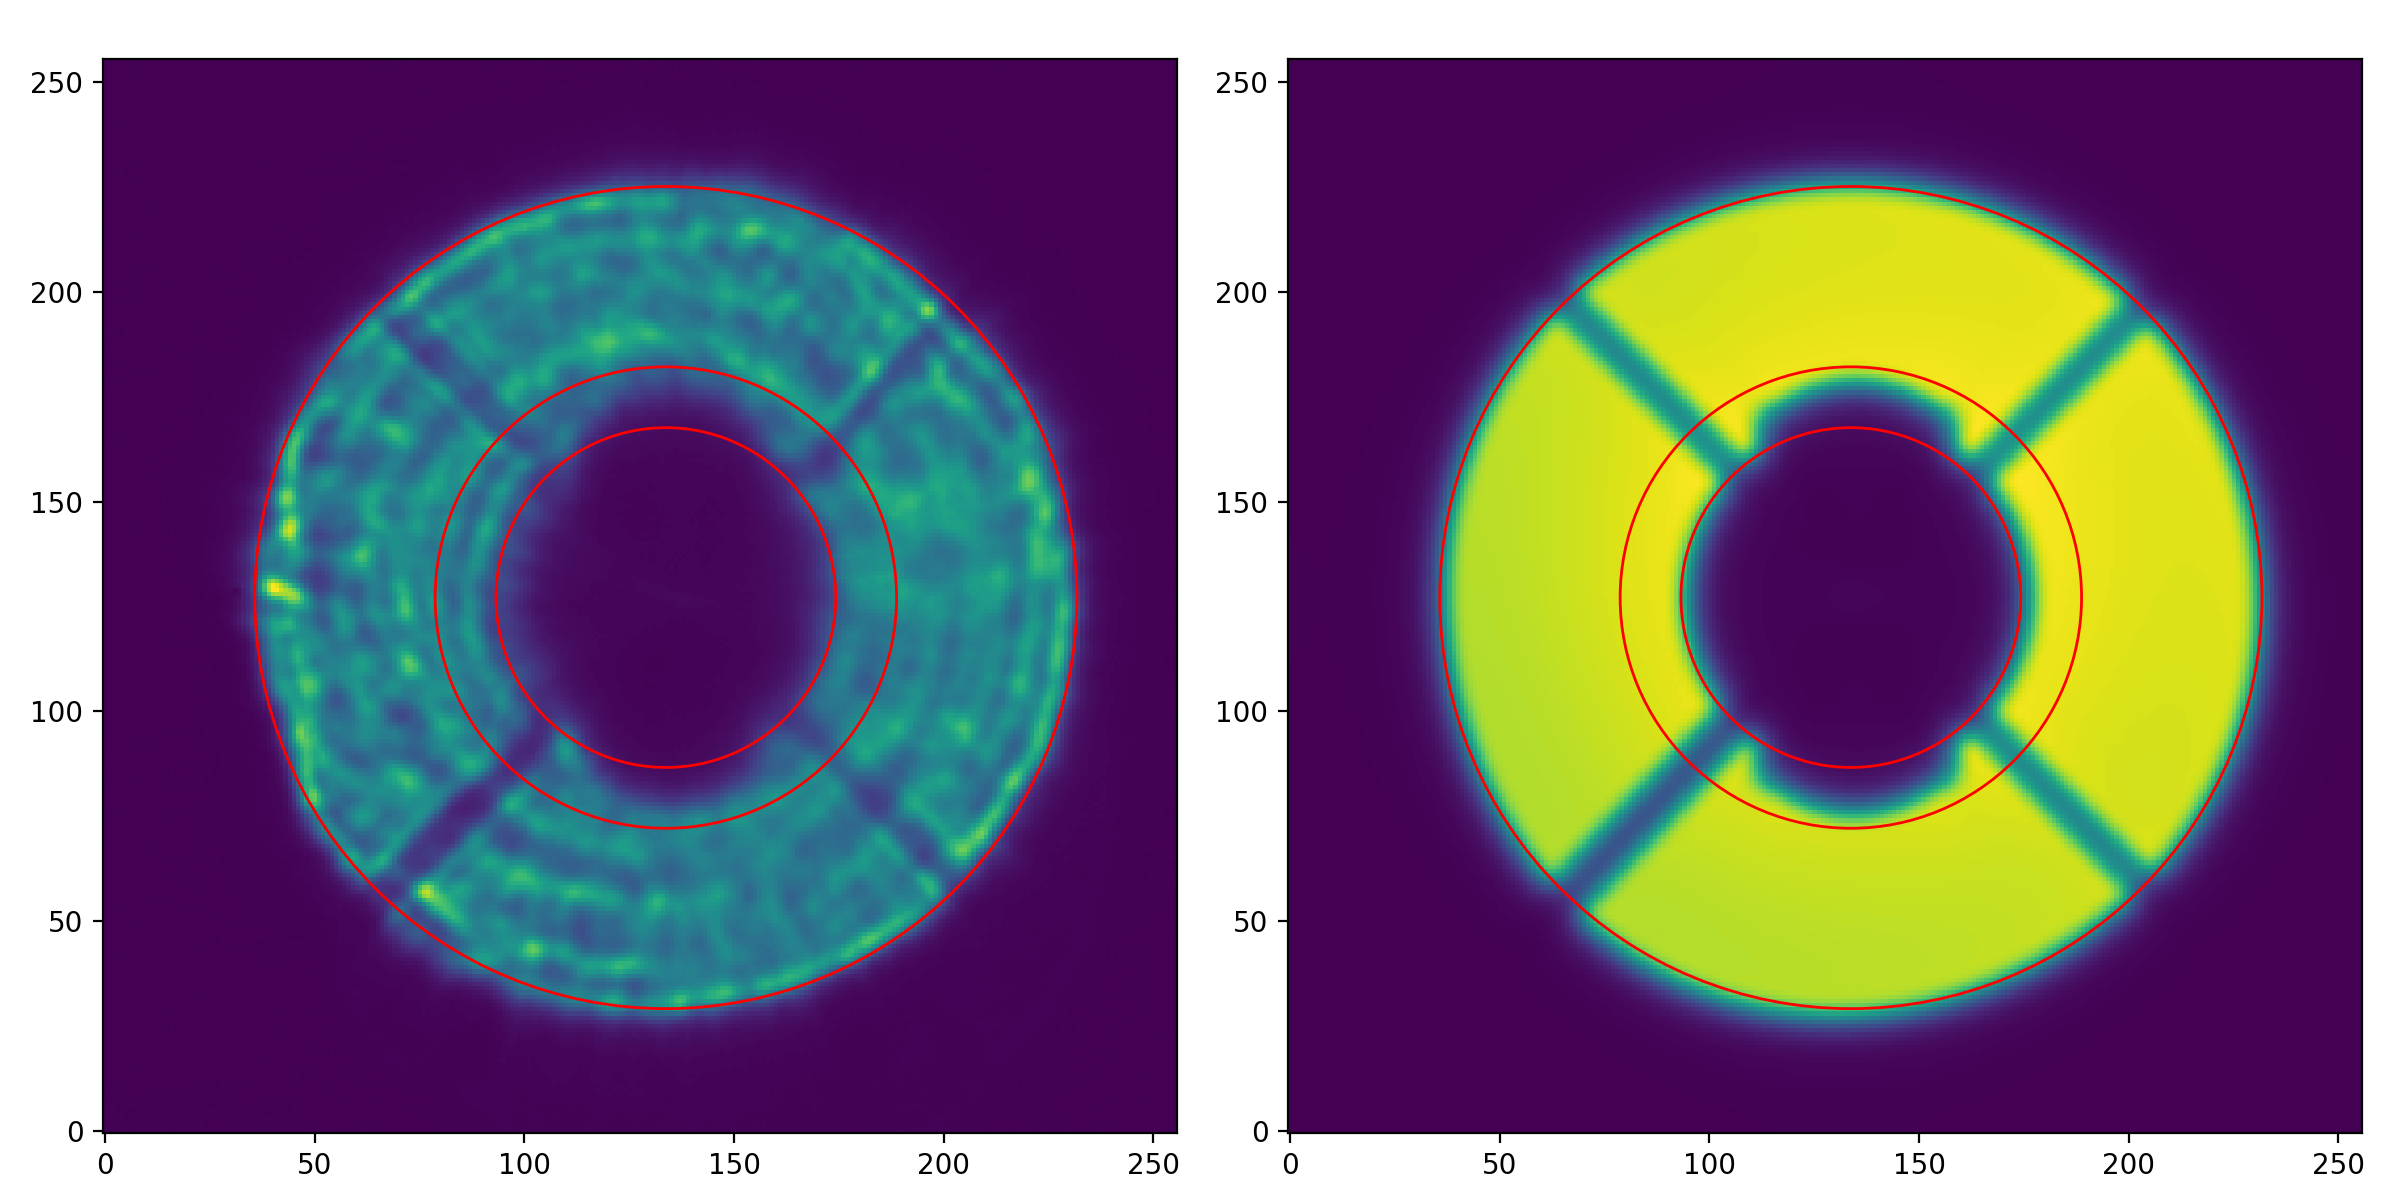

In [6]:
f,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(imdata,origin='lower',interpolation='None')
ax[1].imshow(immodel,origin='lower',interpolation='None')

# offset_x,y = 4 Lambda F * z2,3 =  0.56 pixels/wave * z2,3
xcenter = 127.5 - 0.56 * bigd[1].header['ZERN2']
ycenter= 127.5 - 0.56 * bigd[1].header['ZERN3']
radius = 98.
circ0 = Circle((xcenter,ycenter),radius,color='r', fill=False)
ax[0].add_patch(circ0)
circ1 = Circle((xcenter,ycenter),radius,color='r', fill=False)
ax[1].add_patch(circ1)

innerradius = 55.
incirc0 = Circle((xcenter,ycenter),innerradius,color='r', fill=False)
ax[0].add_patch(incirc0)
incirc1 = Circle((xcenter,ycenter),innerradius,color='r', fill=False)
ax[1].add_patch(incirc1)

innerradius = 40.5
incirc0 = Circle((xcenter,ycenter),innerradius,color='r', fill=False)
ax[0].add_patch(incirc0)
incirc1 = Circle((xcenter,ycenter),innerradius,color='r', fill=False)
ax[1].add_patch(incirc1)

f.tight_layout()


In [8]:
# now plot around in azimuth

yGrid,xGrid = itricks.mgrid[0:256:256j,0:256:256j]
dyGrid = yGrid-ycenter
dxGrid = xGrid-xcenter
rGrid = np.sqrt(dyGrid**2+dxGrid**2)
thetaGrid = np.arctan2(dyGrid,dxGrid)

In [9]:
print(dyGrid.shape)

(256, 256)


<IPython.core.display.Javascript object>


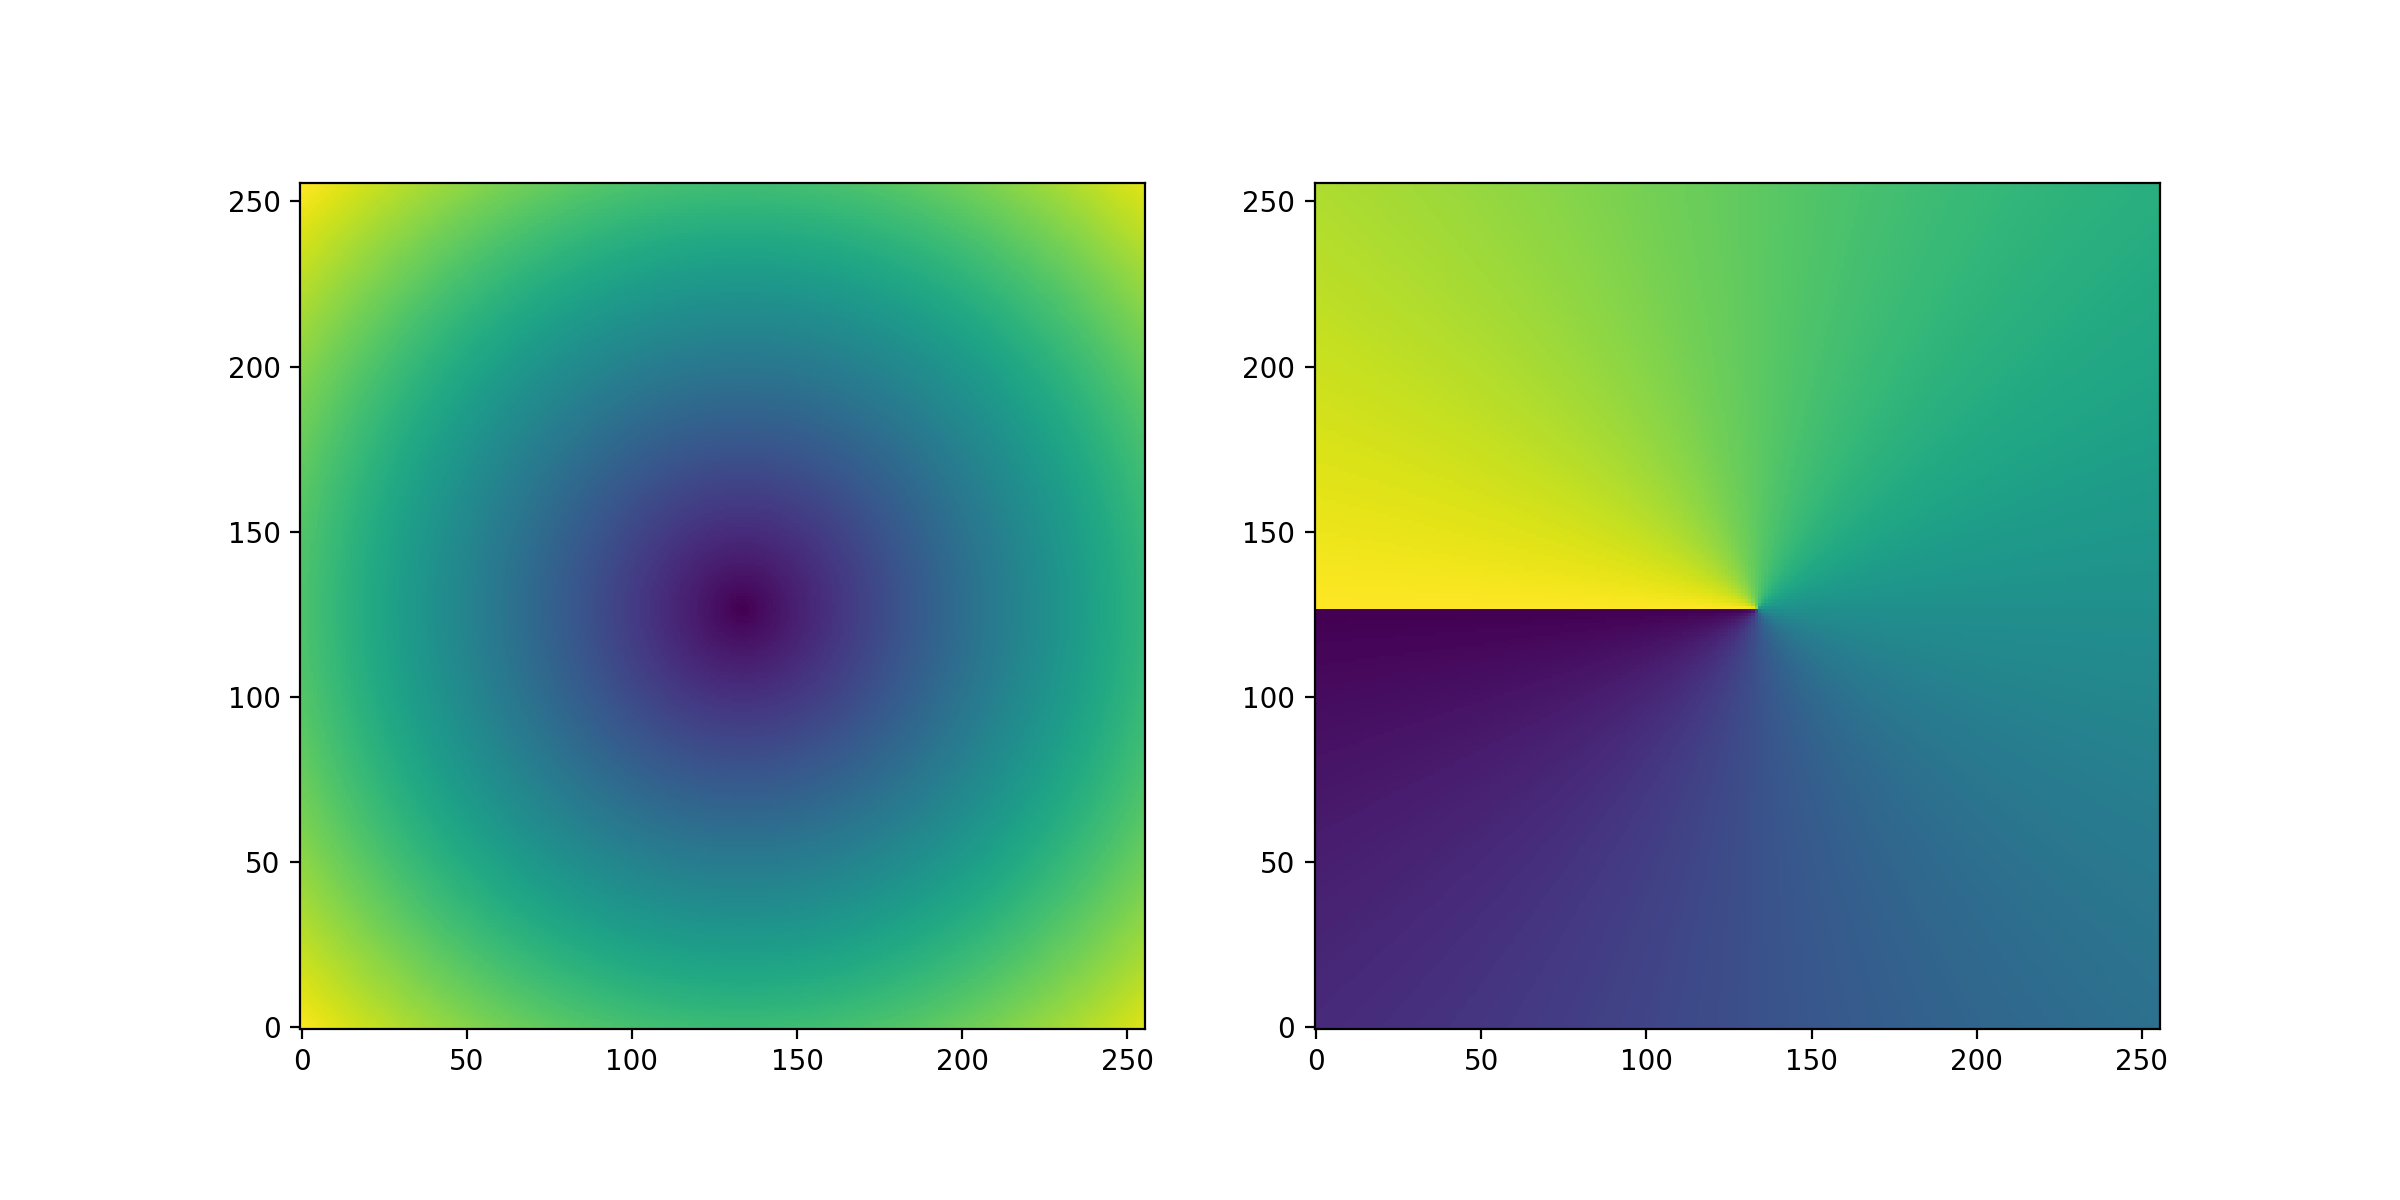

In [10]:
f,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(rGrid,origin='lower',interpolation='None')
ax[1].imshow(thetaGrid,origin='lower',interpolation='None')


In [11]:
def mkProfile(xarr,yarr,nx=100,xmin=0.,xmax=1.0,ymin=0.,ymax=1.0,retPlot=True):
    dx = (xmax-xmin)/nx
    bins = np.arange(xmin,xmax+dx,dx)
    nbin = len(bins)-1
    #print(dx,bins,nbin)

    inrange = (yarr>=ymin) & (yarr<ymax)
    yinrange = yarr[inrange]
    xinrange = xarr[inrange]
    
    ind = np.digitize(xinrange,bins) - 1.   #np.digitize starts at bin=1
    
    xval = np.zeros(nbin)
    xerr = np.zeros(nbin)
    yval = np.zeros(nbin)
    yerr = np.zeros(nbin)
    
    for i in range(nbin):
        inbin = (ind==i)
        xinbin = xinrange[inbin]
        yinbin = yinrange[inbin]
        
        nentries = len(yinbin)

        xval[i] = 0.5*(bins[i+1]+bins[i])
        xerr[i] = 0.5*(bins[i+1]-bins[i])
        if nentries>0:
            yval[i] = np.mean(yinbin)
            yerr[i] = np.std(yinbin)/np.sqrt(nentries)
            #print(i,xval[i],xerr[i],yval[i],yerr[i])
        
    if retPlot:
        profile = plt.errorbar(xval,yval,xerr=xerr,yerr=yerr)
        return profile
    else:
        return xval,yval,xerr,yerr



<IPython.core.display.Javascript object>


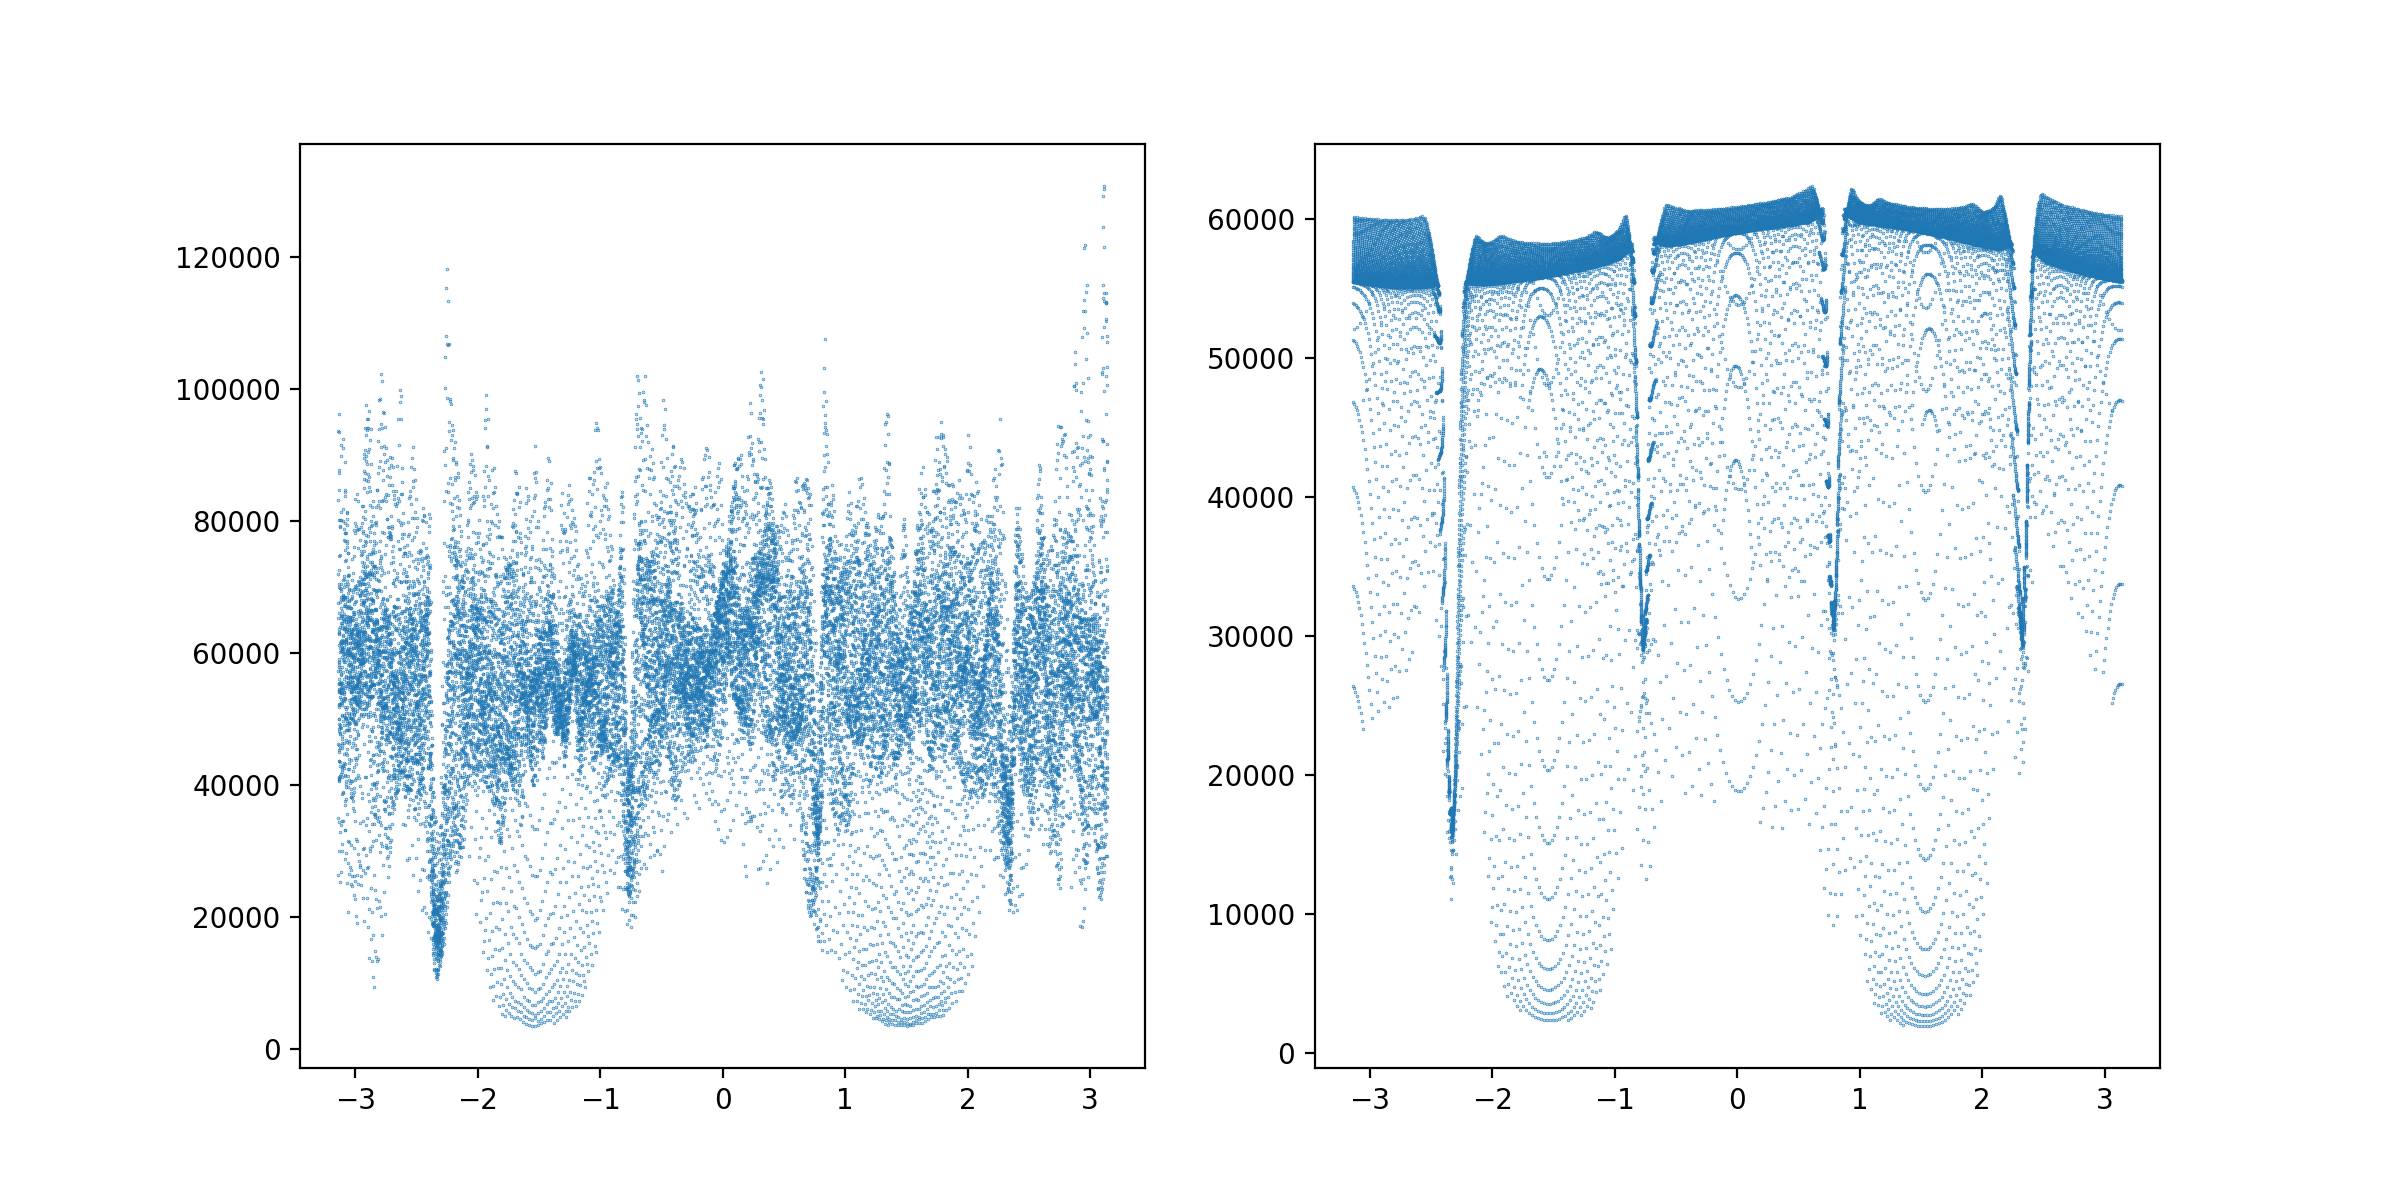

In [12]:
okr = (rGrid>innerradius) & (rGrid<radius)

f,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].scatter(thetaGrid[okr].flatten(),imdata[okr].flatten(),marker='.',s=0.2)
ax[1].scatter(thetaGrid[okr].flatten(),immodel[okr].flatten(),marker='.',s=0.2)





<IPython.core.display.Javascript object>


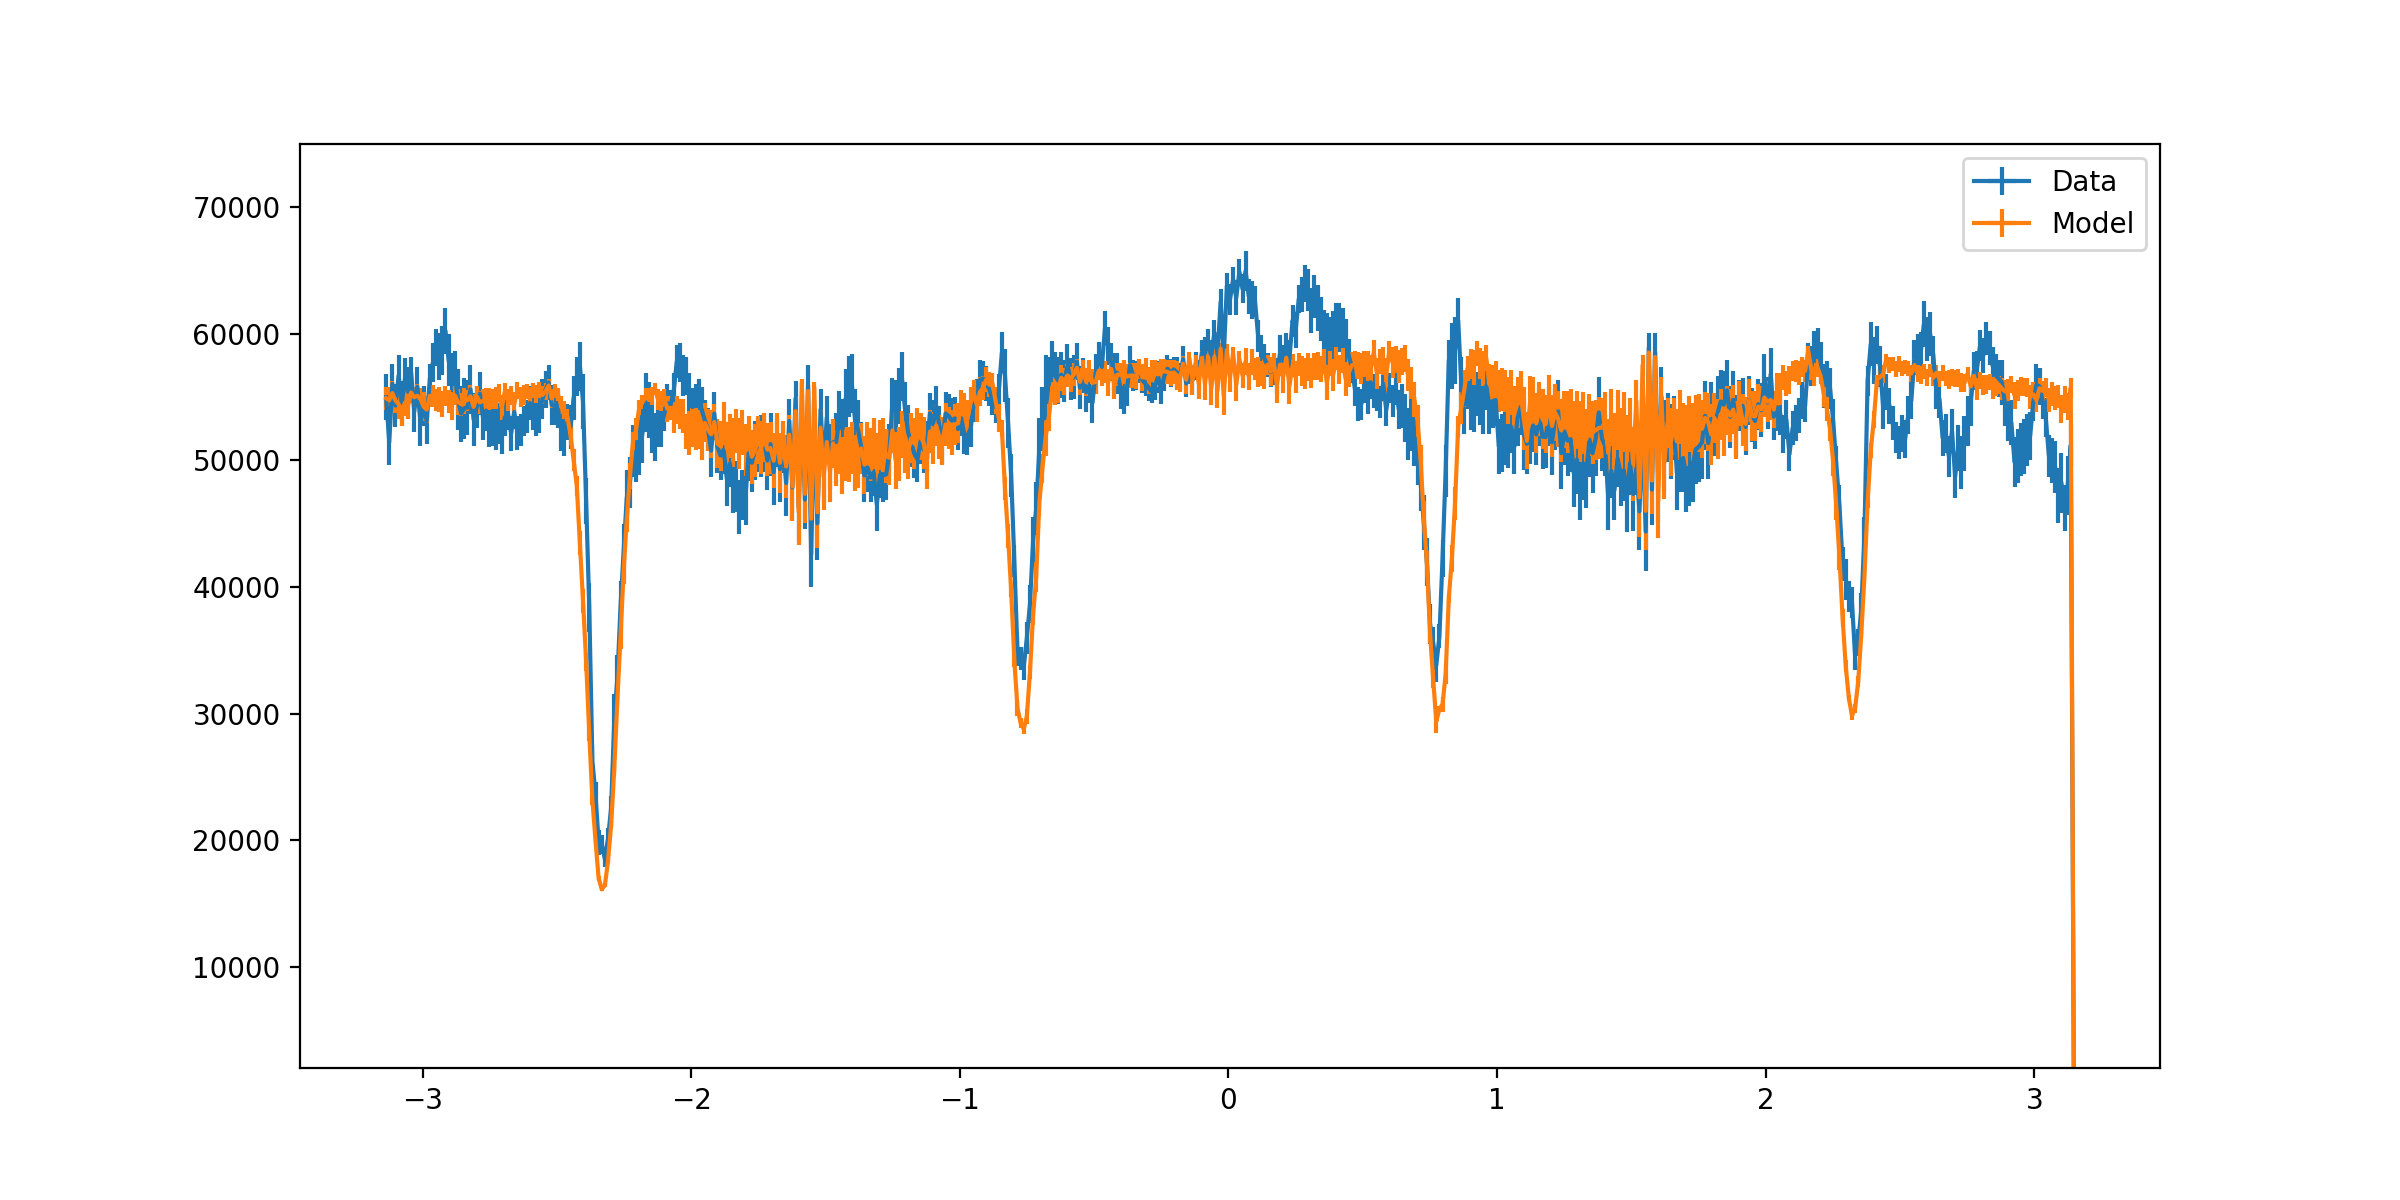

In [13]:
# plot profiles vs. theta

theta1_ave,data_ave,etheta1,edata = mkProfile(thetaGrid[okr].flatten(),imdata[okr].flatten(),nx=90*6,xmin=-3.14159,xmax=3.14159,ymin=-5000.,ymax=75000.,retPlot=False)
theta2_ave,model_ave,etheta2,emodel = mkProfile(thetaGrid[okr].flatten(),immodel[okr].flatten(),nx=90*6,xmin=-3.14159,xmax=3.14159,ymin=-5000.,ymax=75000.,retPlot=False)

f,ax = plt.subplots(figsize=(12,6))
ax.errorbar(theta1_ave,data_ave,xerr=etheta1,yerr=edata,label='Data')
ax.errorbar(theta2_ave,model_ave,xerr=etheta2,yerr=emodel,label='Model')
ax.set_ylim(2000.,75000.)
ax.legend()


# previous fit had x5,x2,x2,x2 for the spiders

# this fit has to x7,x3.5,x3.5,x3.5

# try 6.5,3,3,3 next

<IPython.core.display.Javascript object>


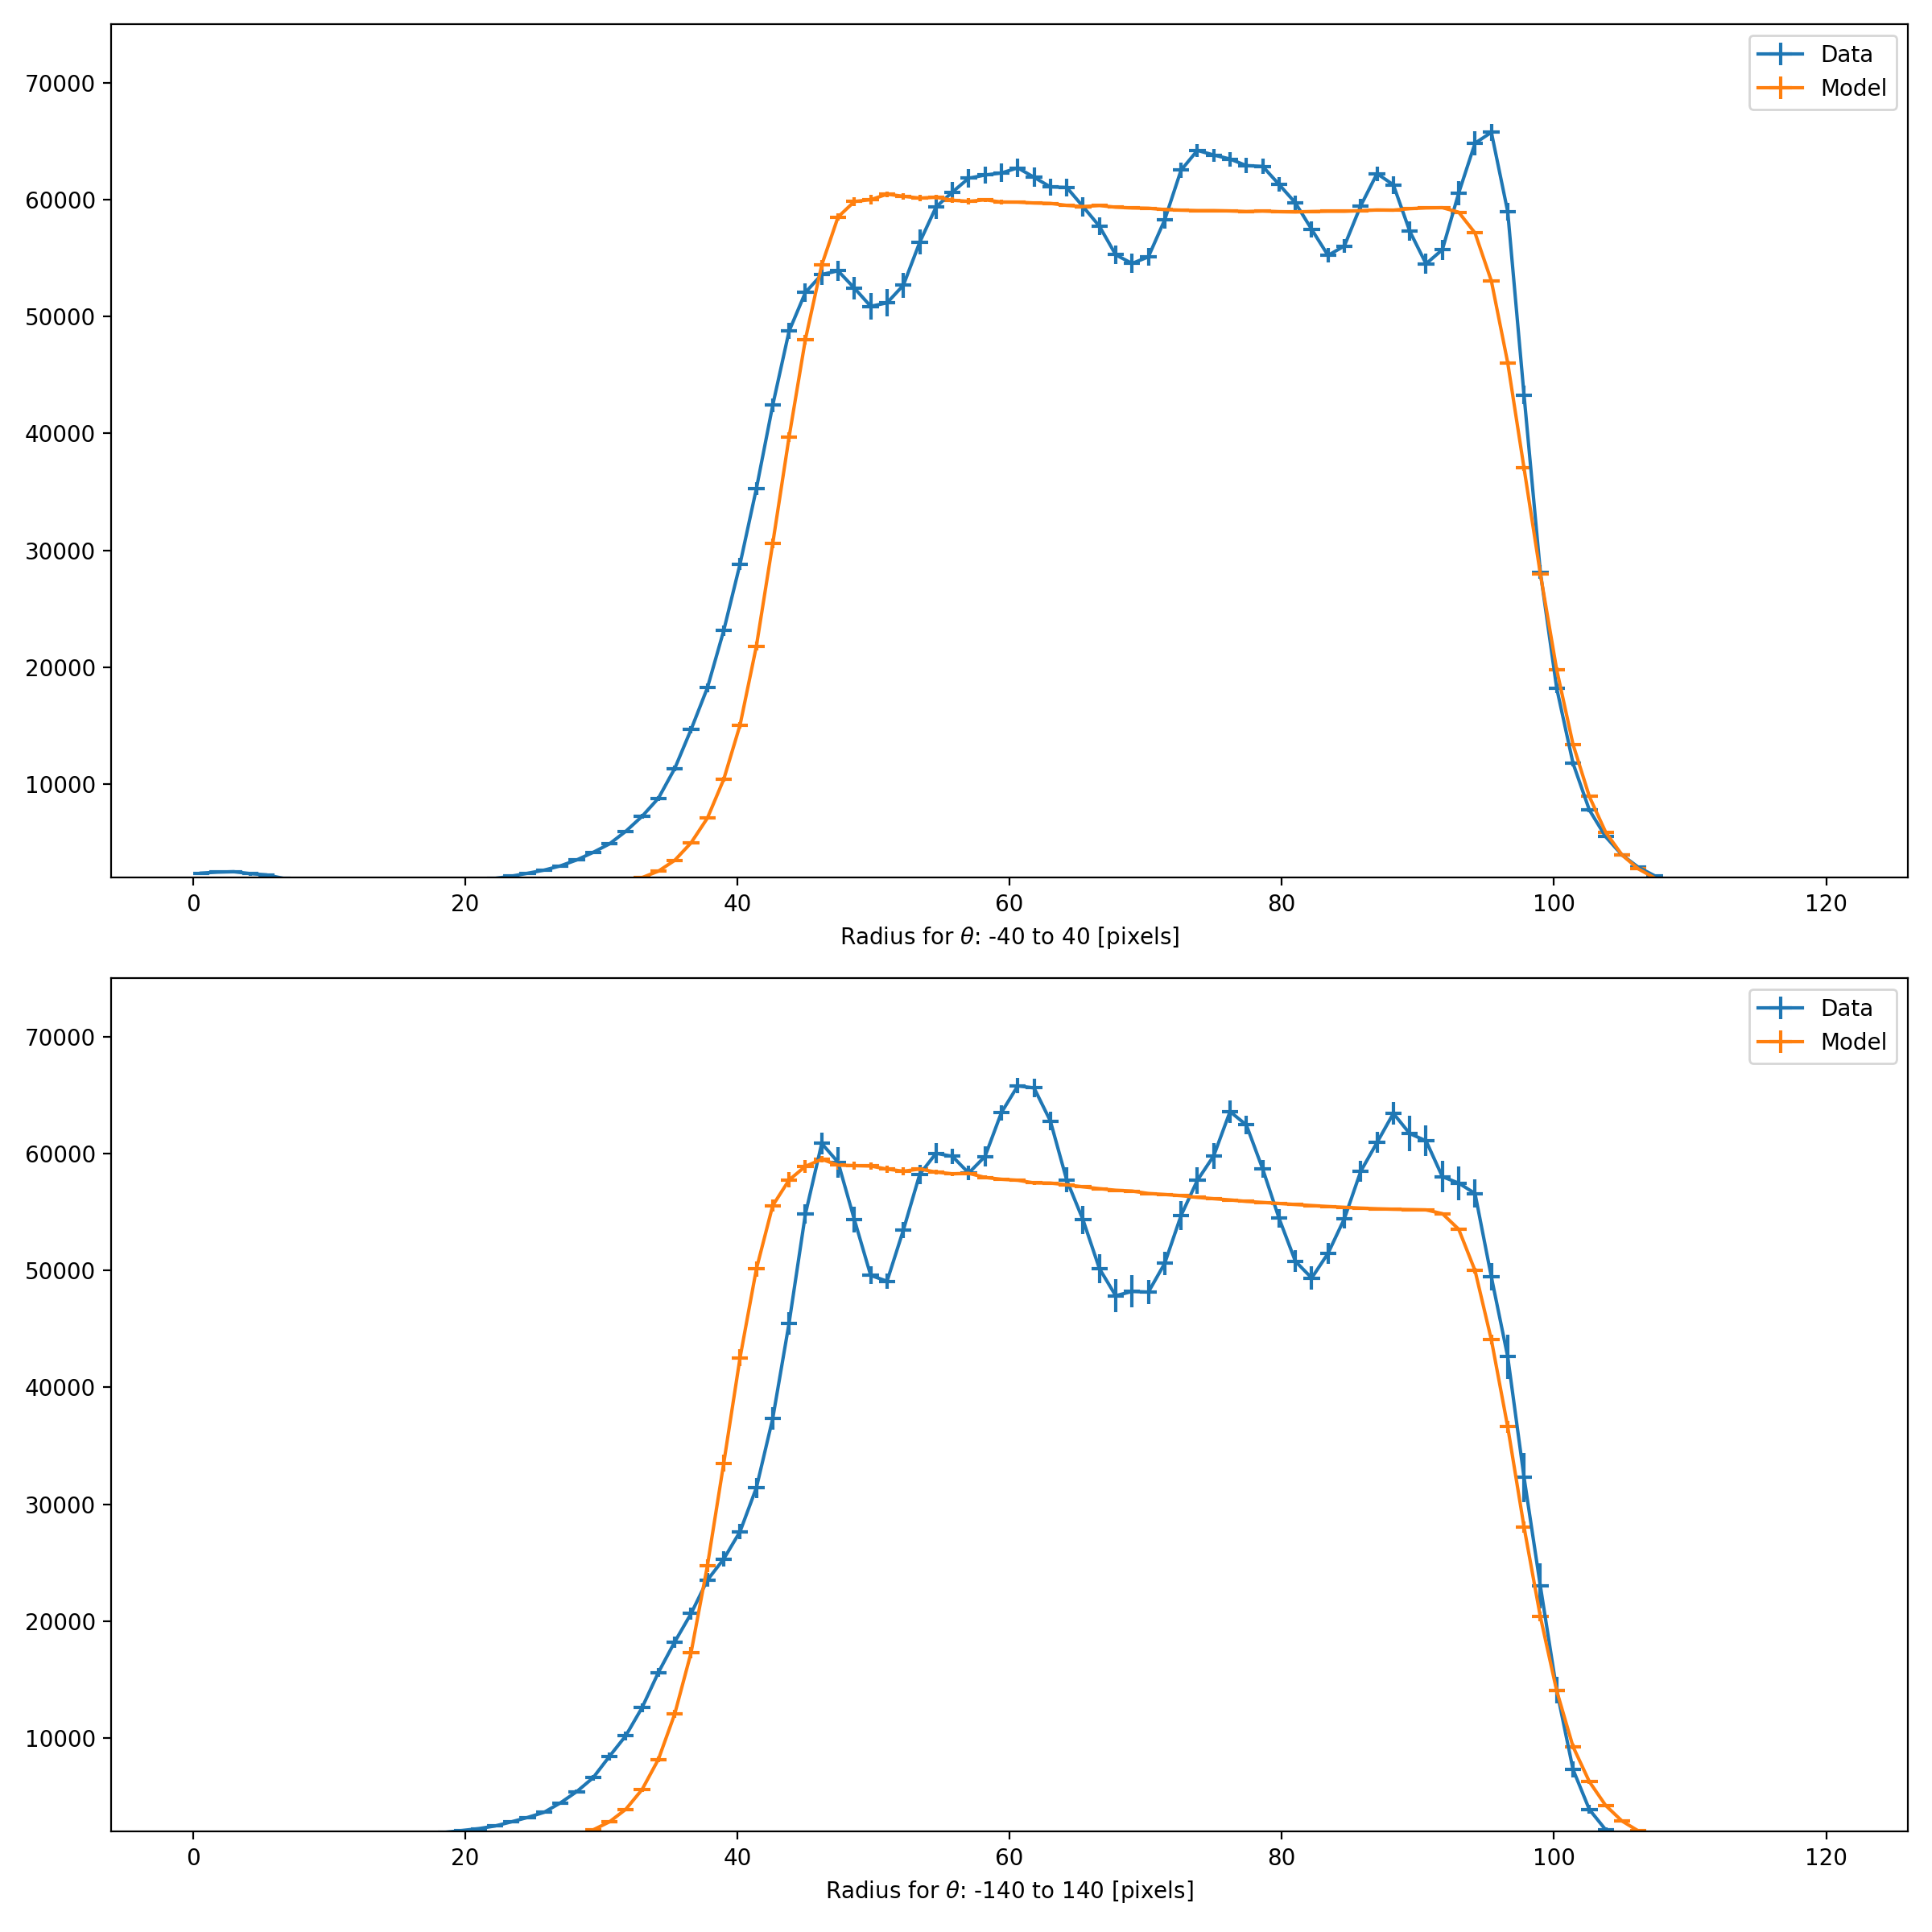

In [14]:
# plot radius for Theta between +-40 deg around Theta = 0 or 180
ok1 = (thetaGrid>np.deg2rad(-40.)) & (thetaGrid<np.deg2rad(40.))
ok2 = (thetaGrid<np.deg2rad(140.)) & (thetaGrid<np.deg2rad(-140.))

f,ax = plt.subplots(2,1,figsize=(12,12))

r1_ave,data_ave,er1,edata = mkProfile(rGrid[ok1].flatten(),imdata[ok1].flatten(),nx=100,xmin=0.,xmax=120.,ymin=-5000.,ymax=75000.,retPlot=False)
r2_ave,model_ave,er2,emodel = mkProfile(rGrid[ok1].flatten(),immodel[ok1].flatten(),nx=100,xmin=0.,xmax=120.,ymin=-5000.,ymax=75000.,retPlot=False)
ax[0].errorbar(r1_ave,data_ave,xerr=er1,yerr=edata,label='Data')
ax[0].errorbar(r2_ave,model_ave,xerr=er2,yerr=emodel,label='Model')
ax[0].set_xlabel(r'Radius for $\theta$: -40 to 40 [pixels]')
ax[0].set_ylim(2000.,75000.)
ax[0].legend()

r1_ave,data_ave,er1,edata = mkProfile(rGrid[ok2].flatten(),imdata[ok2].flatten(),nx=100,xmin=0.,xmax=120.,ymin=-5000.,ymax=75000.,retPlot=False)
r2_ave,model_ave,er2,emodel = mkProfile(rGrid[ok2].flatten(),immodel[ok2].flatten(),nx=100,xmin=0.,xmax=120.,ymin=-5000.,ymax=75000.,retPlot=False)
ax[1].errorbar(r1_ave,data_ave,xerr=er1,yerr=edata,label='Data')
ax[1].errorbar(r2_ave,model_ave,xerr=er2,yerr=emodel,label='Model')
ax[1].set_xlabel(r'Radius for $\theta$: -140 to 140 [pixels]')
ax[1].set_ylim(2000.,75000.)
ax[1].legend()

f.tight_layout()





In [15]:
tempd = fits.open("/u/ec/roodman/kipacdisk/Donuts/bigdonuts/DECam_runwave_00236392.S4.0003.third.donut.fits")
tempd.info()
waved = fits.open("/u/ec/roodman/Astrophysics/Code/Donut/test/wavetest.wave.fits")
waved.info()

Filename: /u/ec/roodman/kipacdisk/Donuts/bigdonuts/DECam_runwave_00236392.S4.0003.third.donut.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  S4            1 PrimaryHDU      85   ()      
  1  S4            1 ImageHDU        88   (256, 256)   float64   
  2  S4            1 ImageHDU        48   (256, 256)   float64   
  3                1 ImageHDU         7   (256, 256)   float64   
  4                1 ImageHDU         7   (2048, 2048)   float64   
Filename: /u/ec/roodman/Astrophysics/Code/Donut/test/wavetest.wave.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1009   ()      
  1  MODEL_IMAGE    1 ImageHDU         8   (256, 256)   float64   
  2  ORIGINAL_IMAGE    1 ImageHDU         8   (256, 256)   float64   
  3  IMAGE-MODEL    1 ImageHDU         8   (256, 256)   float64   
  4  CHI2 IMAGE-MODEL    1 ImageHDU         8   (256, 256)   float64   
  5  ZERNIKE_WAVEFRONT    1 ImageHDU         8   (2048, 2048)

In [16]:
print(tempd[1].header)

XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  256                                                  NAXIS2  =                  256                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               DX      =            -999999.9                                                  DY      =            -999999.9                                                  DZ      =            -999999.9                                                  TX      =            -999999.9                                                  TY      =            -999999.9                                                  TZ      =            -999999.9          

In [17]:
imdata_temp = tempd[2].data - tempd[1].header['BKGD']
immodel_temp = tempd[1].data - tempd[1].header['BKGD']
immodel_wave = waved[1].data - tempd[1].header['BKGD']

<IPython.core.display.Javascript object>


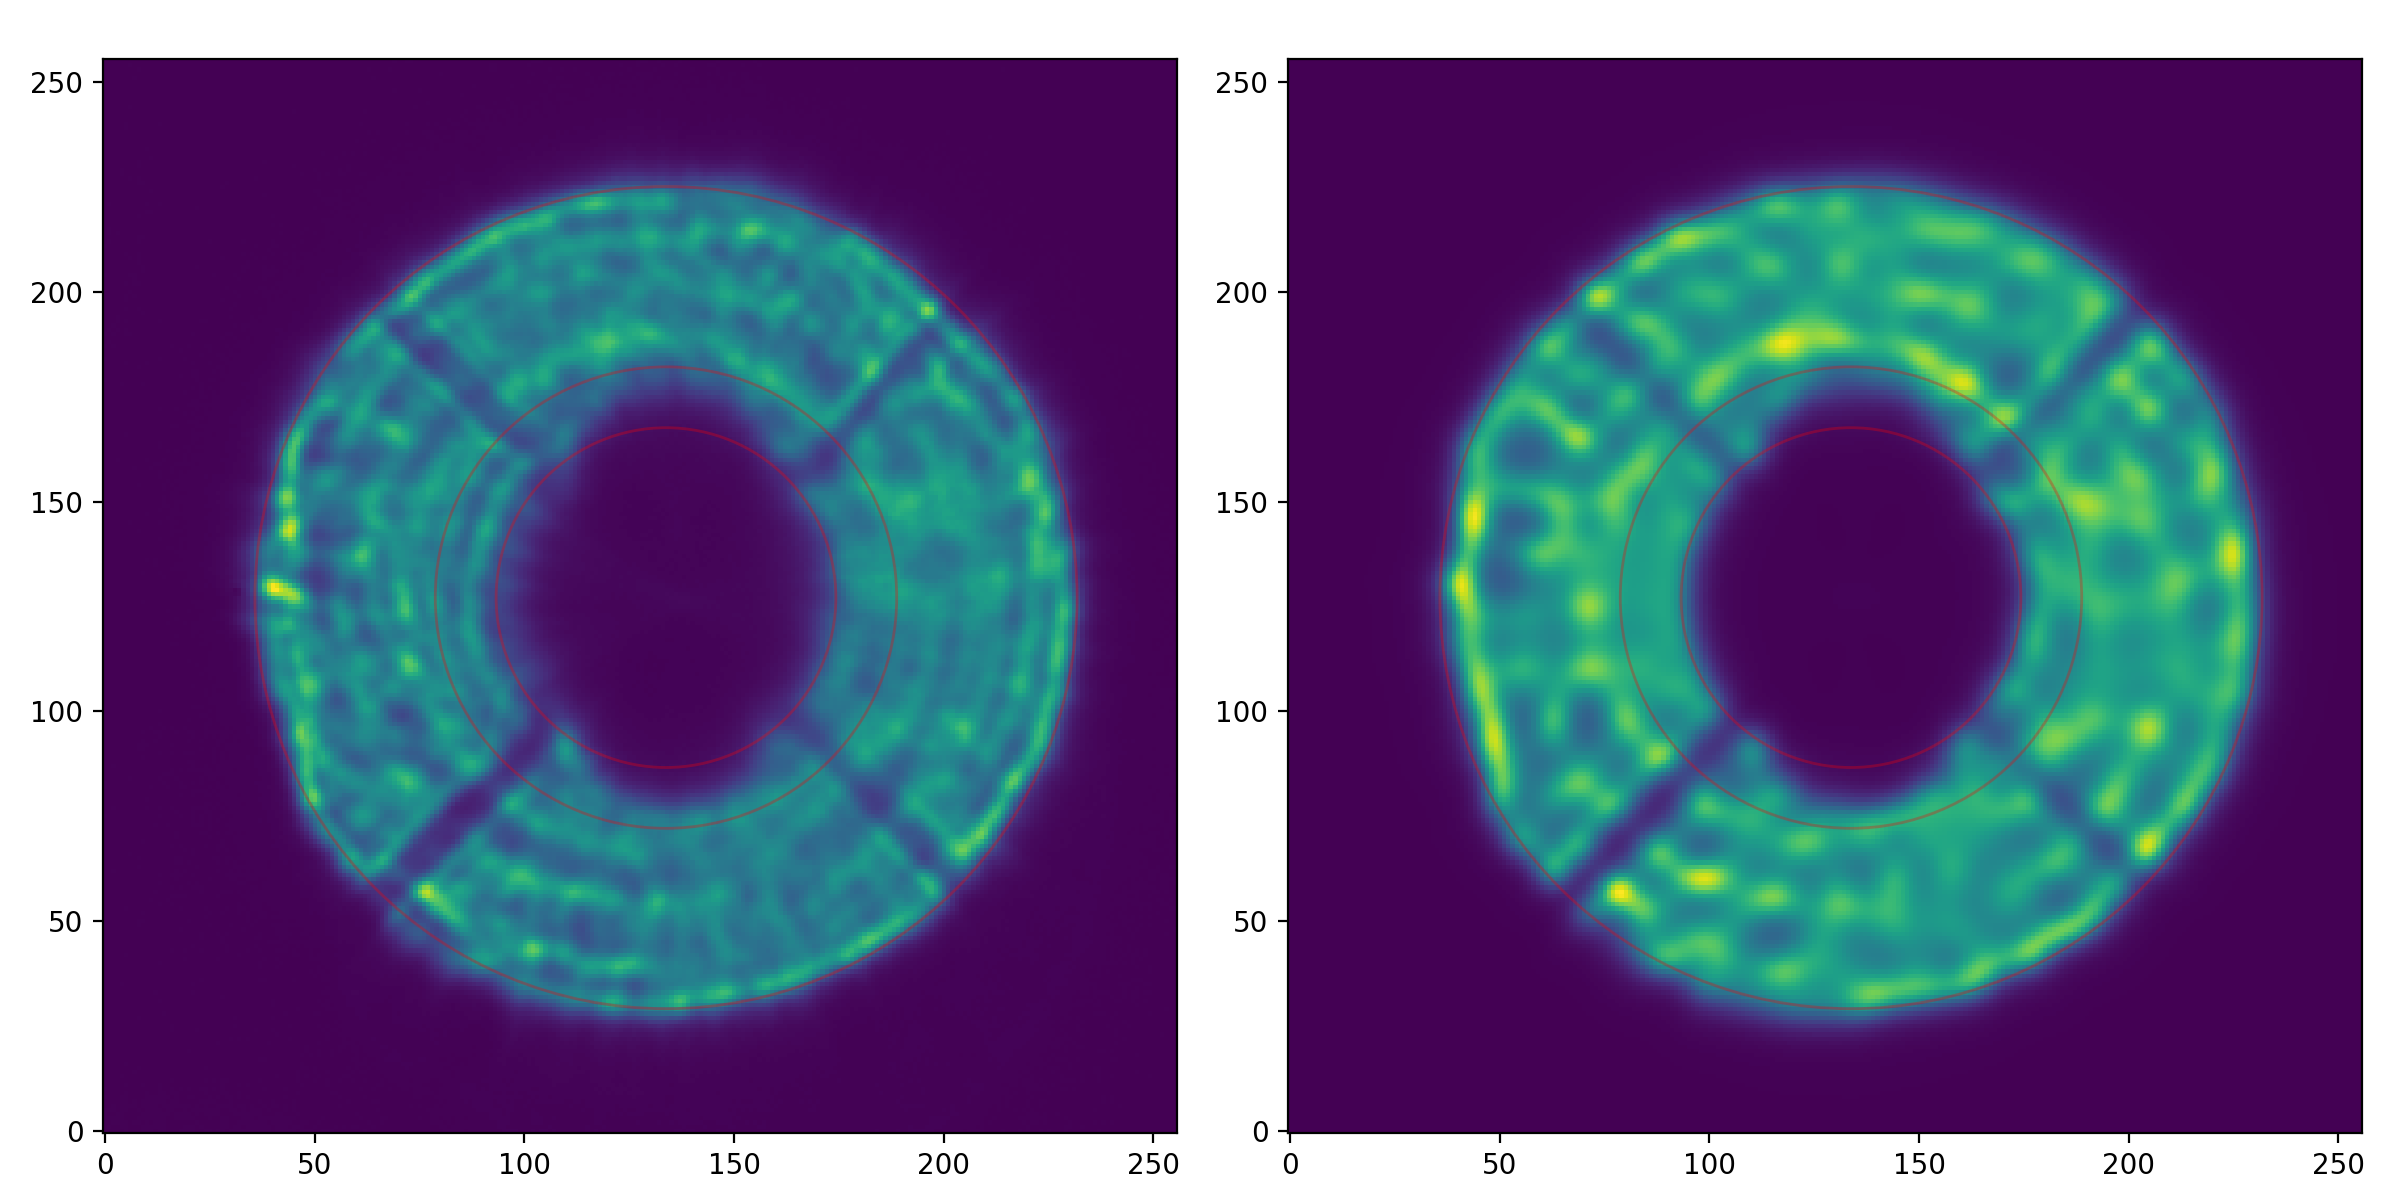

In [18]:
f,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(imdata_temp,origin='lower',interpolation='None')
ax[1].imshow(immodel_wave,origin='lower',interpolation='None')

# offset_x,y = 4 Lambda F * z2,3 =  0.56 pixels/wave * z2,3
xcenter = 127.5 - 0.56 * tempd[1].header['ZERN2']
ycenter= 127.5 - 0.56 * tempd[1].header['ZERN3']
radius = 98.
circ0 = Circle((xcenter,ycenter),radius,color='r', fill=False, alpha=0.3)
ax[0].add_patch(circ0)
circ1 = Circle((xcenter,ycenter),radius,color='r', fill=False, alpha=0.3)
ax[1].add_patch(circ1)

innerradius = 55.
incirc0 = Circle((xcenter,ycenter),innerradius,color='r', fill=False, alpha=0.3)
ax[0].add_patch(incirc0)
incirc1 = Circle((xcenter,ycenter),innerradius,color='r', fill=False, alpha=0.3)
ax[1].add_patch(incirc1)

innerradius = 40.5
incirc0 = Circle((xcenter,ycenter),innerradius,color='r', fill=False, alpha=0.3)
ax[0].add_patch(incirc0)
incirc1 = Circle((xcenter,ycenter),innerradius,color='r', fill=False, alpha=0.3)
ax[1].add_patch(incirc1)

f.tight_layout()

In [19]:
# now plot around in aximuth

yGrid,xGrid = itricks.mgrid[0:256:256j,0:256:256j]
dyGrid = yGrid-ycenter
dxGrid = xGrid-xcenter
rGrid = np.sqrt(dyGrid**2+dxGrid**2)
thetaGrid = np.arctan2(dyGrid,dxGrid)

okr = (rGrid>innerradius) & (rGrid<radius)

<IPython.core.display.Javascript object>


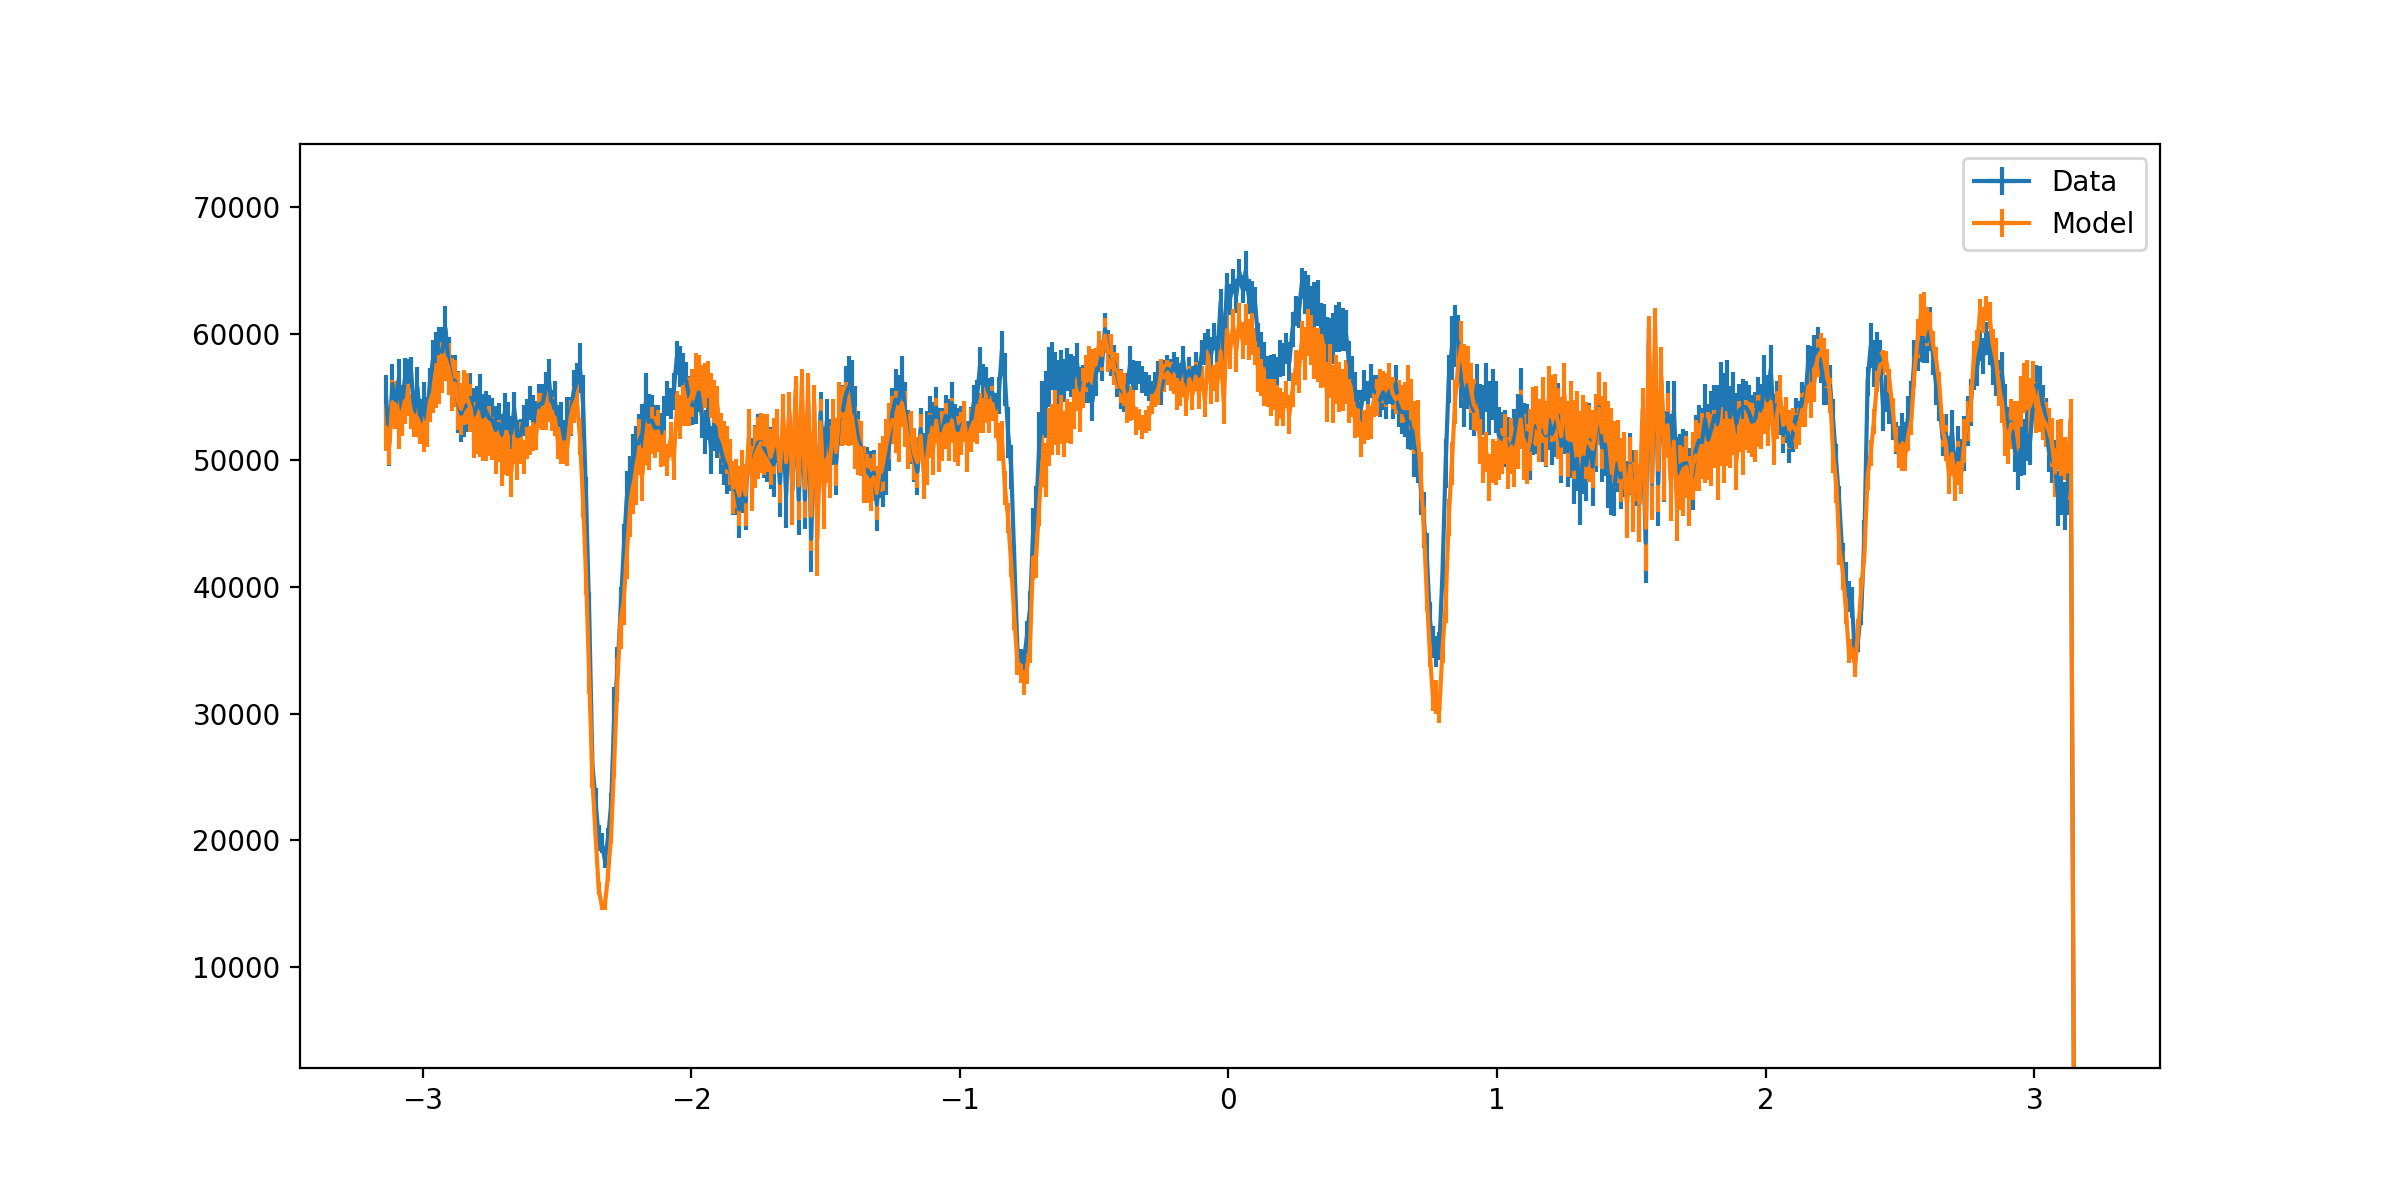

In [20]:
# plot profiles vs. theta
theta1_ave,data_ave,etheta1,edata = mkProfile(thetaGrid[okr].flatten(),imdata_temp[okr].flatten(),nx=90*6,xmin=-3.14159,xmax=3.14159,ymin=-5000.,ymax=75000.,retPlot=False)
theta2_ave,model_ave,etheta2,emodel = mkProfile(thetaGrid[okr].flatten(),immodel_wave[okr].flatten(),nx=90*6,xmin=-3.14159,xmax=3.14159,ymin=-5000.,ymax=75000.,retPlot=False)

f,ax = plt.subplots(figsize=(12,6))
ax.errorbar(theta1_ave,data_ave,xerr=etheta1,yerr=edata,label='Data')
ax.errorbar(theta2_ave,model_ave,xerr=etheta2,yerr=emodel,label='Model')
ax.set_ylim(2000.,75000.)
ax.legend()

<IPython.core.display.Javascript object>


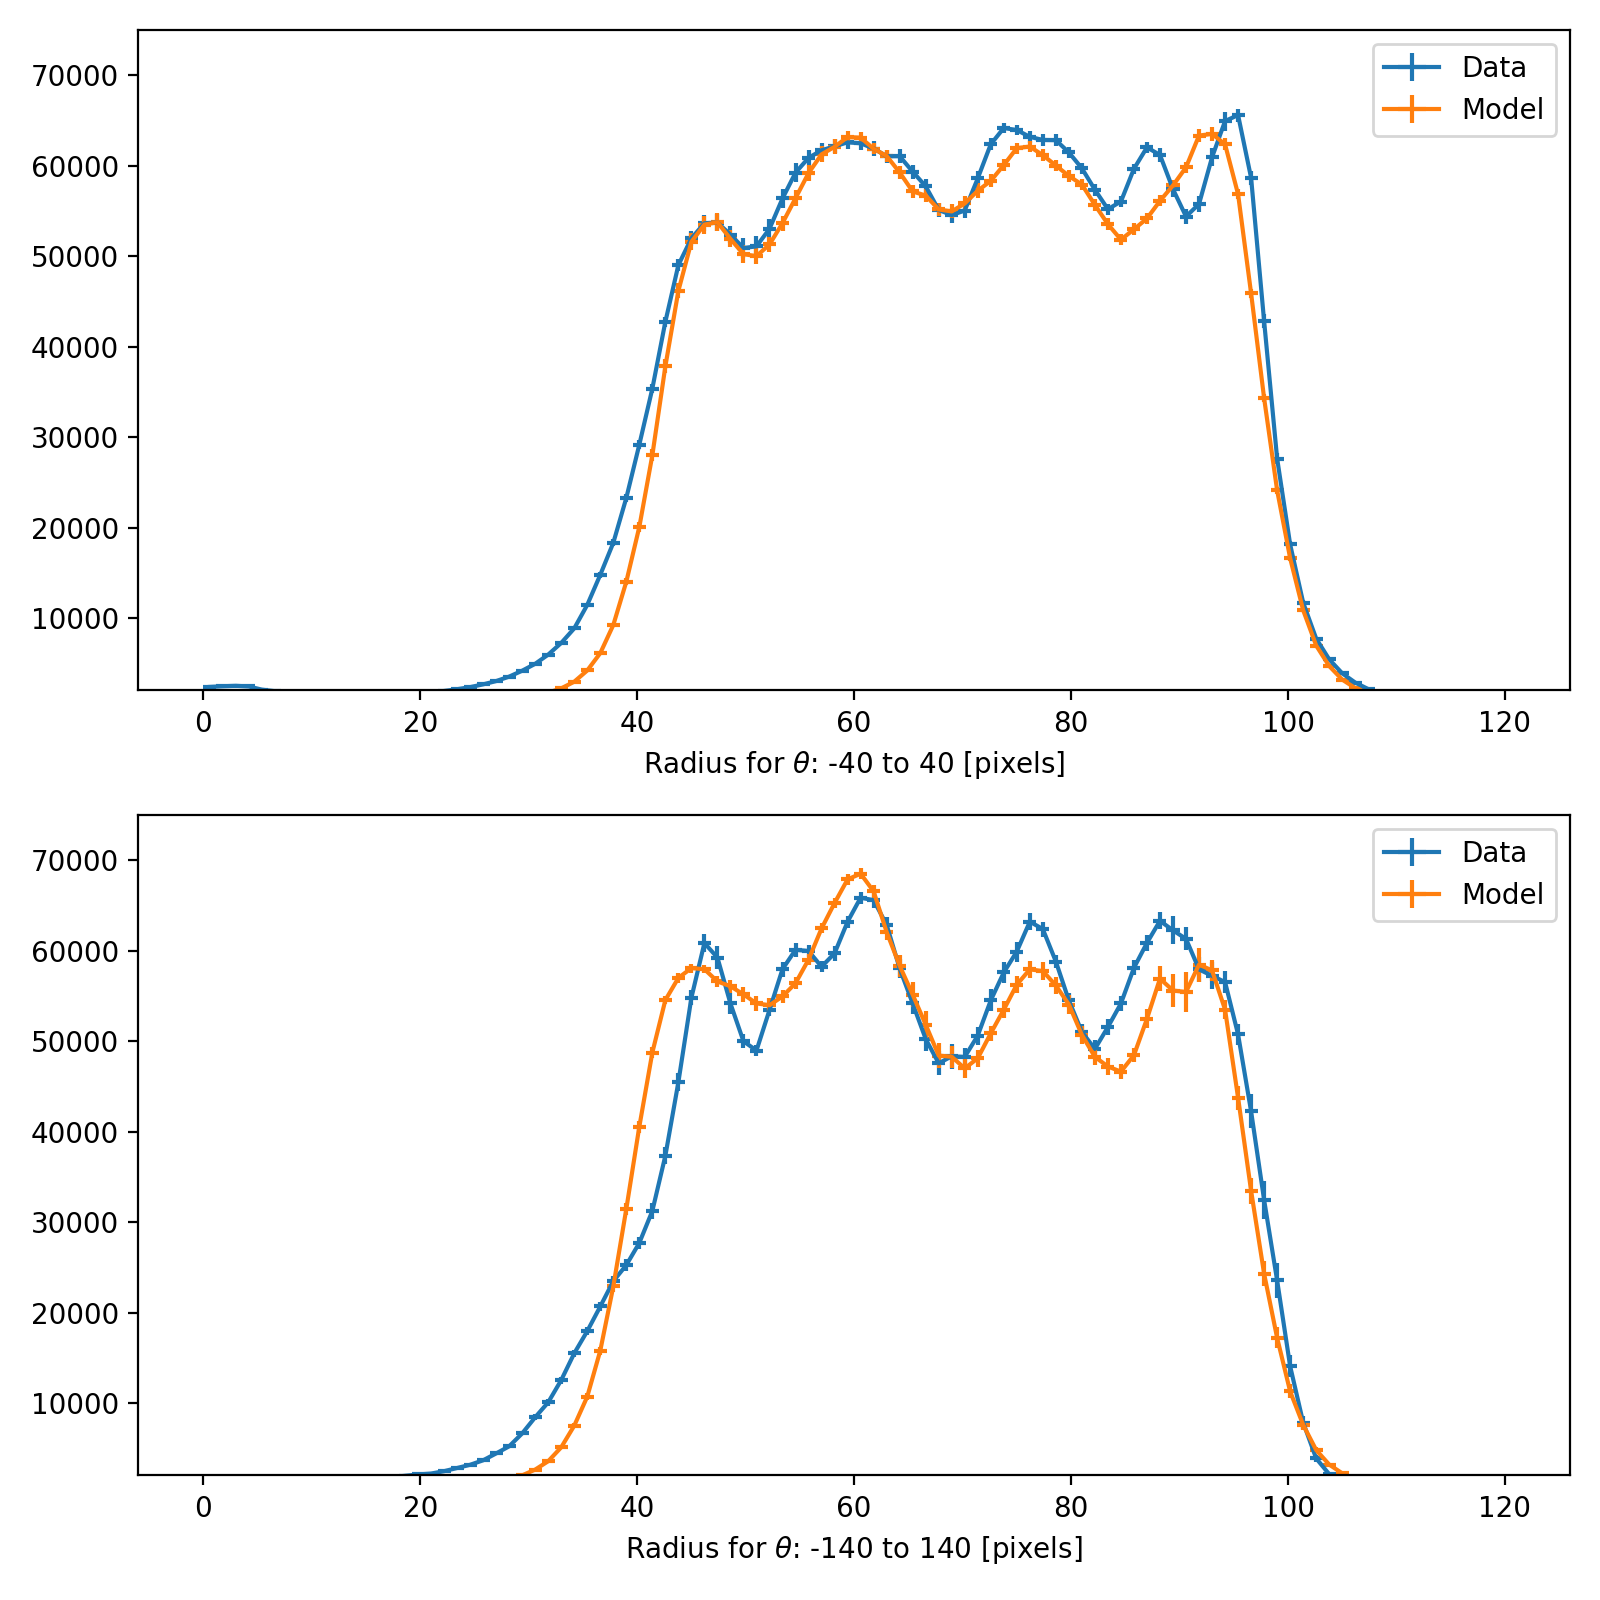

In [21]:
# plot radius for Theta between +-40 deg around Theta = 0 or 180
ok1 = (thetaGrid>np.deg2rad(-40.)) & (thetaGrid<np.deg2rad(40.))
ok2 = (thetaGrid<np.deg2rad(140.)) & (thetaGrid<np.deg2rad(-140.))

f,ax = plt.subplots(2,1,figsize=(8,8))

r1_ave,data_ave,er1,edata = mkProfile(rGrid[ok1].flatten(),imdata_temp[ok1].flatten(),nx=100,xmin=0.,xmax=120.,ymin=-5000.,ymax=75000.,retPlot=False)
r2_ave,model_ave,er2,emodel = mkProfile(rGrid[ok1].flatten(),immodel_wave[ok1].flatten(),nx=100,xmin=0.,xmax=120.,ymin=-5000.,ymax=75000.,retPlot=False)
ax[0].errorbar(r1_ave,data_ave,xerr=er1,yerr=edata,label='Data')
ax[0].errorbar(r2_ave,model_ave,xerr=er2,yerr=emodel,label='Model')
ax[0].set_xlabel(r'Radius for $\theta$: -40 to 40 [pixels]')
ax[0].set_ylim(2000.,75000.)
ax[0].legend()

r1_ave,data_ave,er1,edata = mkProfile(rGrid[ok2].flatten(),imdata_temp[ok2].flatten(),nx=100,xmin=0.,xmax=120.,ymin=-5000.,ymax=75000.,retPlot=False)
r2_ave,model_ave,er2,emodel = mkProfile(rGrid[ok2].flatten(),immodel_wave[ok2].flatten(),nx=100,xmin=0.,xmax=120.,ymin=-5000.,ymax=75000.,retPlot=False)
ax[1].errorbar(r1_ave,data_ave,xerr=er1,yerr=edata,label='Data')
ax[1].errorbar(r2_ave,model_ave,xerr=er2,yerr=emodel,label='Model')
ax[1].set_xlabel(r'Radius for $\theta$: -140 to 140 [pixels]')
ax[1].set_ylim(2000.,75000.)
ax[1].legend()

f.tight_layout()

# Compare wavefit for regular donut vs. bigdonut

In [22]:
wavedreg = fits.open("/u/ec/roodman/Astrophysics/Code/Donut/test/runwave.wave.fits")
wavedreg.info()


Filename: /u/ec/roodman/Astrophysics/Code/Donut/test/runwave.wave.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1029   ()      
  1                1 ImageHDU         7   (64, 64)   float64   
  2                1 ImageHDU         7   (64, 64)   float64   
  3                1 ImageHDU         7   (64, 64)   float64   
  4                1 ImageHDU         7   (64, 64)   float64   
  5                1 ImageHDU         7   (512, 512)   float64   
  6                1 ImageHDU         7   (512, 512)   float64   
  7                1 ImageHDU         7   (512, 512)   float64   
  8                1 ImageHDU         7   (32, 32)   float64   
  9                1 ImageHDU         7   (32, 32)   float64   


<IPython.core.display.Javascript object>


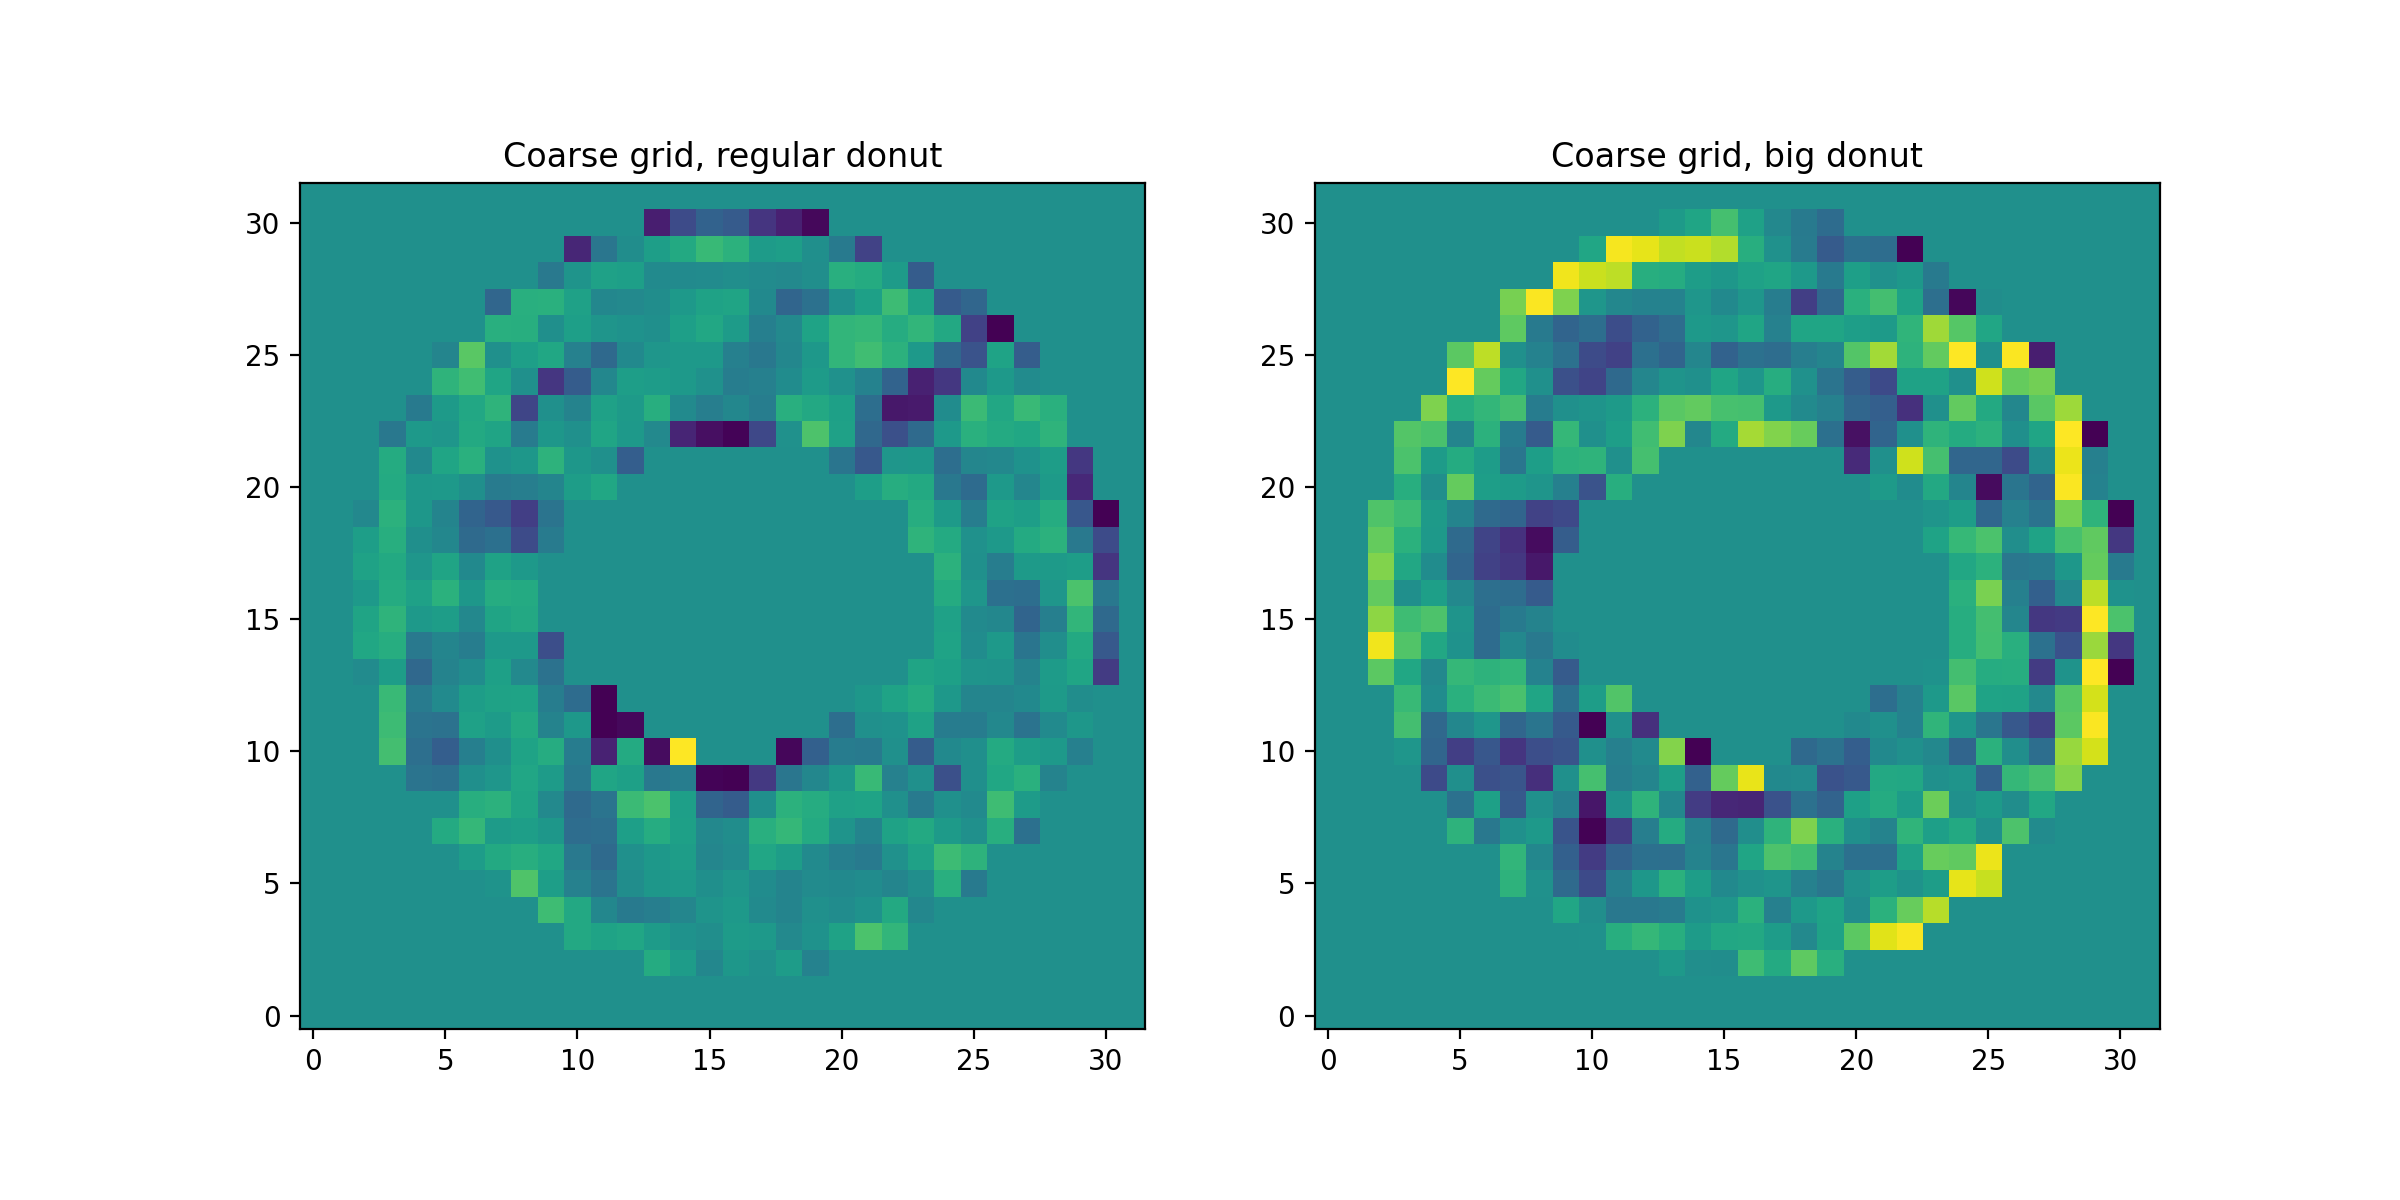

Text(0.5, 1.0, 'Coarse grid, big donut')

In [23]:
f,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(wavedreg[8].data,origin='lower',interpolation='None')
ax[0].set_title("Coarse grid, regular donut")
ax[1].imshow(waved[8].data,origin='lower',interpolation='None')
ax[1].set_title("Coarse grid, big donut")

<IPython.core.display.Javascript object>


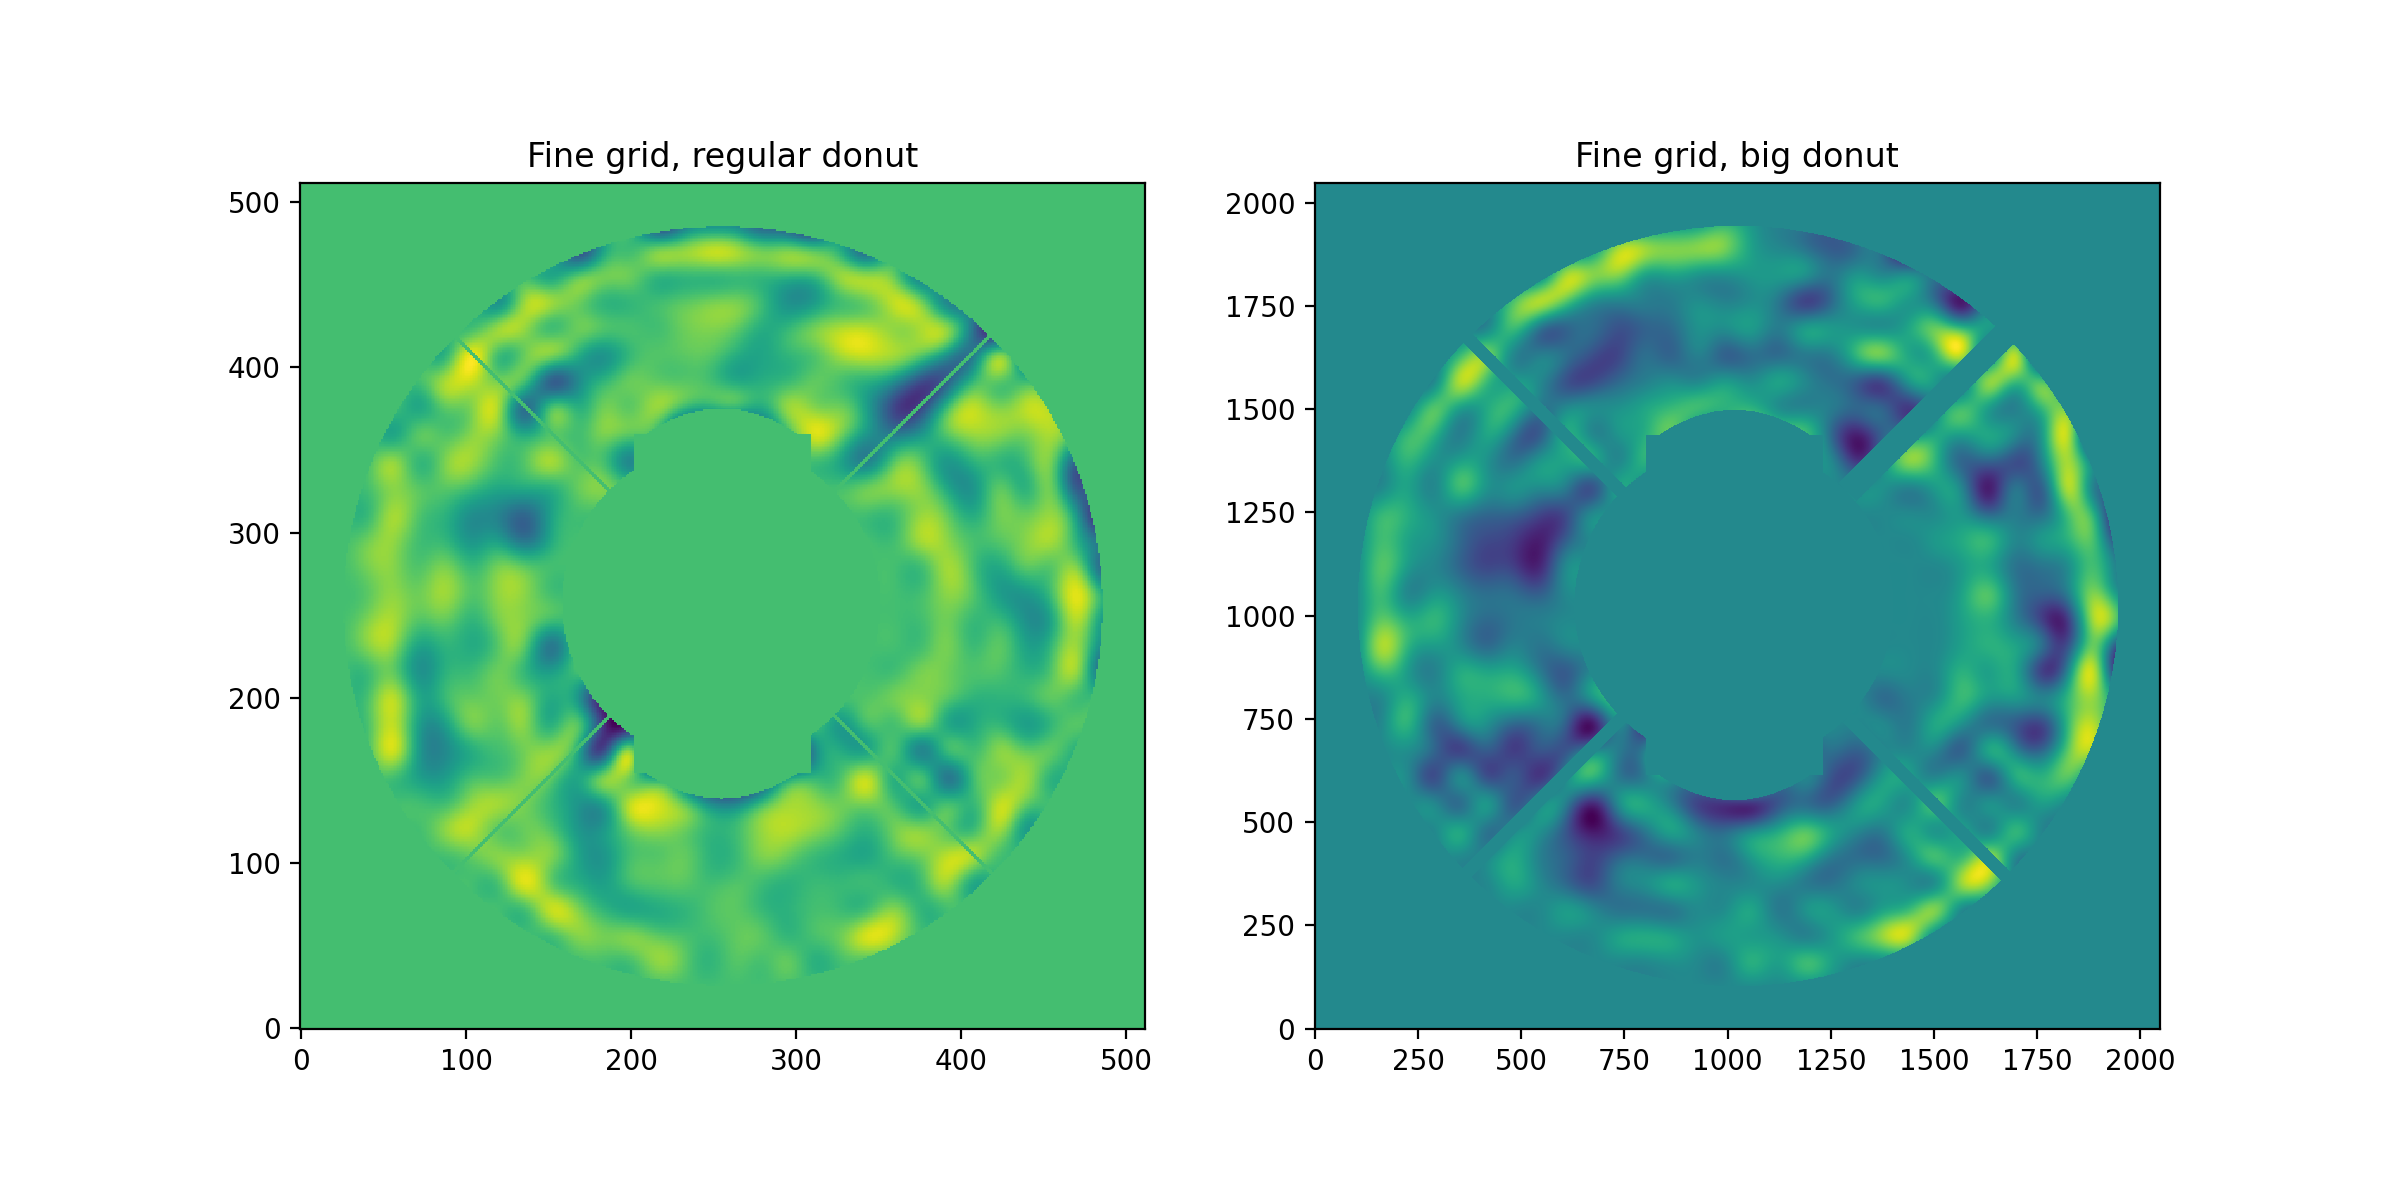

Text(0.5, 1.0, 'Fine grid, big donut')

In [24]:
f,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(wavedreg[7].data,origin='lower',interpolation='None')
ax[0].set_title("Fine grid, regular donut")
ax[1].imshow(waved[7].data,origin='lower',interpolation='None')
ax[1].set_title("Fine grid, big donut")

<IPython.core.display.Javascript object>


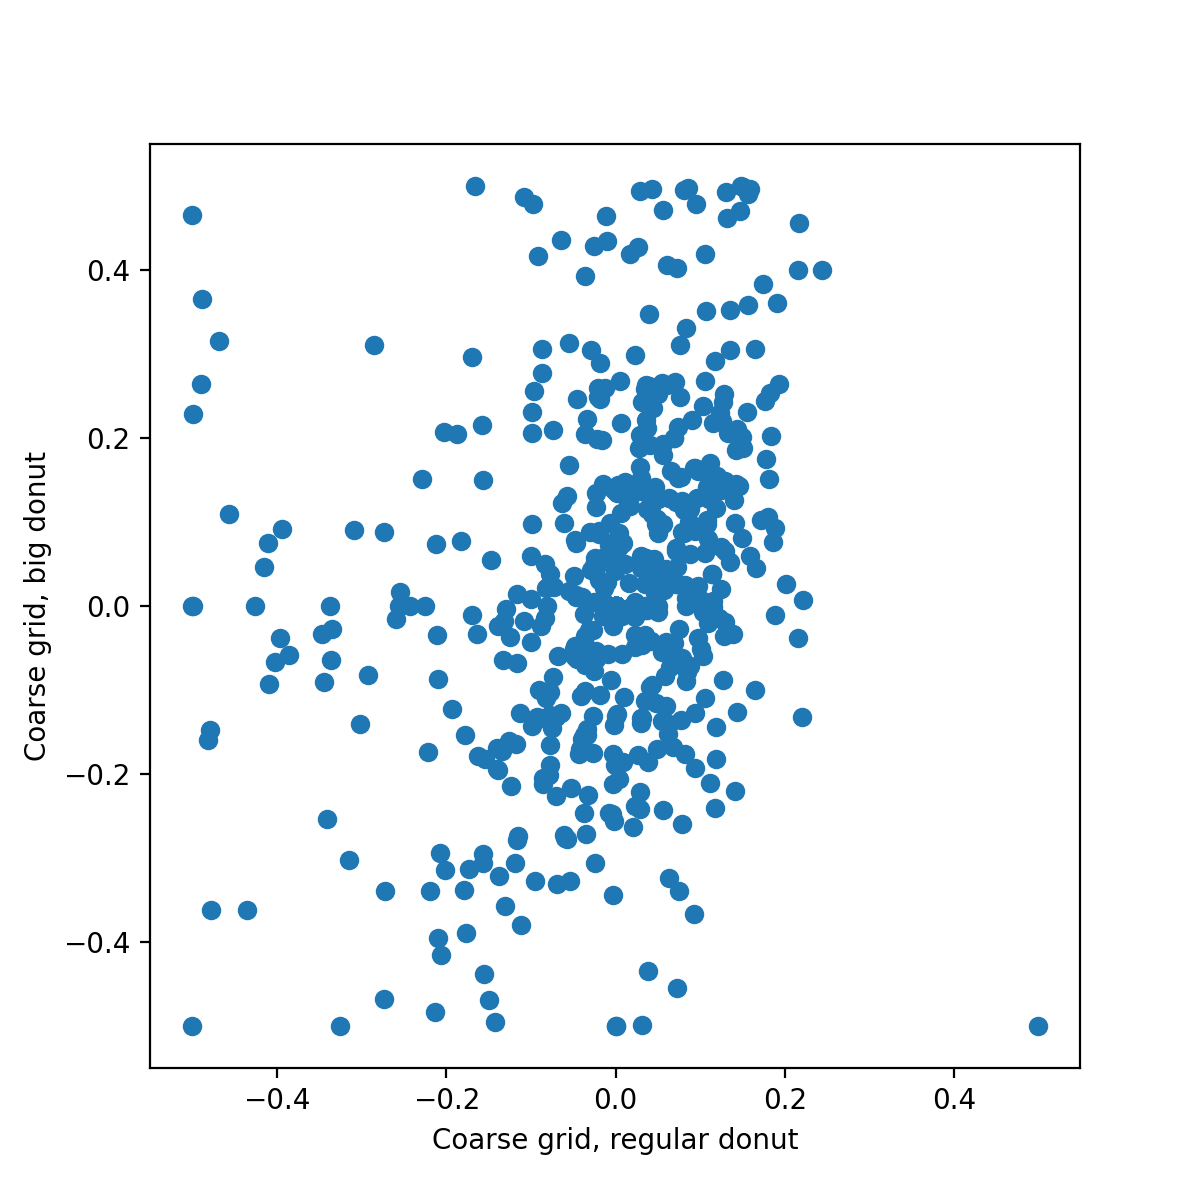

Text(0, 0.5, 'Coarse grid, big donut')

In [25]:
# correlation between coarse grids...
f,ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(wavedreg[8].data.flatten(),waved[8].data.flatten())
ax.set_xlabel("Coarse grid, regular donut")
ax.set_ylabel("Coarse grid, big donut")

# Todo
1. Add wavefront fit to donut fit pipeline
2. is 64x64 coarse grid viable?
3. Run on donuts from good bigdonut image
4. Assess wavefront performance on regular donuts